# **Preprocessing**

In [1]:
# import sys
# !{sys.executable} -m pip install catboost

## **Import**

In [1]:
import numpy as np
import pandas as pd
import os
import re
from datetime import datetime
os.getcwd()

'G:\\내 드라이브\\대학원\\연구\\학위논문\\oecd_eval_project'

## **정량적 변수 Load**

#### `id <-> 법안번호 매칭`

In [2]:
bill_dates = pd.read_csv('bill_dates.csv')
bill_ids = bill_dates[['orig_bill_id', 'bill_num']]
bill_ids.columns = ['bill_id', 'bill_num']
bill_ids.head()

,bill_id,bill_num
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,2005003
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,2016203
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2018900
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2015410
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,2016402


### **인적 요소**

#### `1. 공동 발의자 수`

In [3]:
bill_proposers = pd.read_csv('bill_proposers.csv')
bill_proposers

,orig_bill_id,bill_num,cosponsor_count,title_text
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,2005003,32.0,[2005003] 에너지산업클러스터의 지정 및 육성에 관한 특별법안(장병완의원 등 ...
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,2016203,10.0,[2016203] 인사청문회법 일부개정법률안(박광온의원 등 10인)
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2018900,10.0,[2018900] 독립유공자예우에 관한 법률 일부개정법률안(민병두의원 등 10인)
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2015410,10.0,[2015410] 한국수출입은행법 일부개정법률안(김정우의원 등 10인)
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,2016402,10.0,[2016402] 농어촌도로 정비법 일부개정법률안(이찬열의원 등 10인)
...,...,...,...,...
2823,PRC_Z2Y3W0X6W2E9D1B0C2A5J1H4G3F2N1,2123356,11.0,[2123356] 먹는물관리법 일부개정법률안(이주환의원 등 11인)
2824,PRC_Z2Y3X0G2I0F2E1M6L4K5Y4X6W7U2G6,2119824,11.0,[2119824] 규제자유특구 및 지역특화발전특구에 관한 규제특례법 일부개정법률안(...
2825,PRC_Z2Z1W0L6V2P2Q1K5R3E2T0N0J3M4V6,2111999,10.0,[2111999] 도선법 일부개정법률안(윤재갑의원등10인)
2826,PRC_Z2Z2Z0L8D0N9T1J5A5G3U1G4Q8X8S2,2117394,12.0,[2117394] 기후위기 대응을 위한 탄소중립ㆍ녹색성장 기본법 일부개정법률안(전용...


In [4]:
bill_proposers = bill_proposers.merge(bill_ids)
bill_proposers = bill_proposers[['bill_num', 'cosponsor_count']]
bill_proposers.columns = ['bill_num', 'proposers']
bill_proposers.head()

,bill_num,proposers
0,2005003,32.0
1,2016203,10.0
2,2018900,10.0
3,2015410,10.0
4,2016402,10.0


In [5]:
bill_proposers.isna().sum()

bill_num     0
proposers    1
dtype: int64

In [6]:
bill_proposers[bill_proposers.bill_num == 2114056]

,bill_num,proposers
1491,2114056,NaN


In [7]:
bill_proposers.iloc[1491, 1] = 168

In [8]:
bill_proposers.isna().sum()

bill_num     0
proposers    0
dtype: int64

#### `2. 발의 정당 수`

In [9]:
bill_parties = pd.read_csv('bill_parties.csv')
bill_parties.head()

,bill_id,num_parties,parties
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,5,"국민의힘, 더불어민주당, 무소속, 민생당, 민주평화당"
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,3,"국민의힘, 더불어민주당, 무소속"
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2,"더불어민주당, 무소속"
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2,"더불어민주당, 무소속"
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,4,"더불어민주당, 무소속, 미래통합당, 민생당"


In [10]:
bill_parties = bill_parties.merge(bill_ids)[['bill_num', 'num_parties']]
bill_parties.head()

,bill_num,num_parties
0,2005003,5
1,2016203,3
2,2018900,2
3,2015410,2
4,2016402,4


In [11]:
bill_parties.isna().sum()

bill_num       0
num_parties    0
dtype: int64

#### `3. 의원 선수(seniority)`

In [12]:
bill_seniority = pd.read_csv('bill_seniority3.csv')
bill_seniority.head()

,bill_id,num_proposers,avg_seniority,parties
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,42,1.79,"국민의힘, 더불어민주당, 무소속, 민생당, 민주평화당"
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,10,1.70,"국민의힘, 더불어민주당, 무소속"
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,10,1.90,"더불어민주당, 무소속"
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,10,1.90,"더불어민주당, 무소속"
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,10,1.90,"더불어민주당, 무소속, 미래통합당, 민생당"


In [13]:
bill_seniority = bill_seniority.merge(bill_ids)[['avg_seniority', 'bill_num']]
bill_seniority.head()

,avg_seniority,bill_num
0,1.79,2005003
1,1.70,2016203
2,1.90,2018900
3,1.90,2015410
4,1.90,2016402


In [14]:
bill_seniority.isna().sum()

avg_seniority    0
bill_num         0
dtype: int64

### **물적 요소 - 절차 기반**

#### `4. 발의-가결 소요시간`

In [15]:
bill_dates = pd.read_csv('bill_dates.csv')
bill_dates.head()

,orig_bill_id,bill_num,proposal_date,decision_date,decision_result
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,2005003,2017-01-06,2017-11-24,수정가결
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,2016203,2018-10-31,2020-03-05,원안가결
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2018900,2019-02-28,2019-11-19,수정가결
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2015410,2018-09-10,2020-03-06,수정가결
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,2016402,2018-11-07,2019-11-19,원안가결


In [16]:
bill_dates.proposal_date = bill_dates.proposal_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
bill_dates.decision_date = bill_dates.decision_date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
bill_dates = bill_dates.assign(days_required = bill_dates.decision_date - bill_dates.proposal_date)

In [17]:
bill_dates

,orig_bill_id,bill_num,proposal_date,decision_date,decision_result,days_required
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,2005003,2017-01-06,2017-11-24,수정가결,322 days
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,2016203,2018-10-31,2020-03-05,원안가결,491 days
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2018900,2019-02-28,2019-11-19,수정가결,264 days
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2015410,2018-09-10,2020-03-06,수정가결,543 days
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,2016402,2018-11-07,2019-11-19,원안가결,377 days
...,...,...,...,...,...,...
2823,PRC_Z2Y3W0X6W2E9D1B0C2A5J1H4G3F2N1,2123356,2023-07-20,2024-02-01,수정가결,196 days
2824,PRC_Z2Y3X0G2I0F2E1M6L4K5Y4X6W7U2G6,2119824,2023-02-03,2023-10-06,수정가결,245 days
2825,PRC_Z2Z1W0L6V2P2Q1K5R3E2T0N0J3M4V6,2111999,2021-08-11,2021-12-09,수정가결,120 days
2826,PRC_Z2Z2Z0L8D0N9T1J5A5G3U1G4Q8X8S2,2117394,2022-09-16,2023-02-27,수정가결,164 days


In [18]:
bill_dates.proposal_date >= datetime.strptime('2020-06-01', '%Y-%m-%d')

0       False
1       False
2       False
3       False
4       False
        ...  
2823     True
2824     True
2825     True
2826     True
2827     True
Name: proposal_date, Length: 2828, dtype: bool

In [19]:
bill_num_20 = bill_dates[bill_dates.proposal_date < datetime.strptime('2020-06-01', '%Y-%m-%d')].bill_num.reset_index(drop=True)
bill_num_21 = bill_dates[bill_dates.proposal_date >= datetime.strptime('2020-06-01', '%Y-%m-%d')].bill_num.reset_index(drop=True)

In [20]:
bill_num_20

0       2005003
1       2016203
2       2018900
3       2015410
4       2016402
         ...   
1432    2005535
1433    2003249
1434    2009885
1435    2009737
1436    2010469
Name: bill_num, Length: 1437, dtype: int64

In [21]:
bill_num_21

0       2106612
1       2107576
2       2122572
3       2106324
4       2121894
         ...   
1386    2123356
1387    2119824
1388    2111999
1389    2117394
1390    2119776
Name: bill_num, Length: 1391, dtype: int64

In [22]:
bill_dates.days_required[0].days

322

In [23]:
bill_dates.days_required = bill_dates.days_required.apply(lambda x: x.days)

In [24]:
bill_dates.head()

,orig_bill_id,bill_num,proposal_date,decision_date,decision_result,days_required
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,2005003,2017-01-06,2017-11-24,수정가결,322
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,2016203,2018-10-31,2020-03-05,원안가결,491
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2018900,2019-02-28,2019-11-19,수정가결,264
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2015410,2018-09-10,2020-03-06,수정가결,543
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,2016402,2018-11-07,2019-11-19,원안가결,377


In [25]:
bill_dates = bill_dates[['bill_num', 'days_required']]

In [26]:
bill_dates.head()

,bill_num,days_required
0,2005003,322
1,2016203,491
2,2018900,264
3,2015410,543
4,2016402,377


In [27]:
bill_dates.isna().sum()

bill_num         0
days_required    0
dtype: int64

#### `5. 회의 횟수`

In [28]:
bill_meetings = pd.read_csv('bill_meetings.csv')
bill_meetings

,bill_id,법안번호,회의명,회의명개수
0,PRC_A1A7C0W1O0S6N1B6U0I0M2D5J9C7R6,2005003.0,제349회 국회(임시회) 제1차 전체회의 | 제353회 국회(임시회) 제1차 법률안...,9
1,PRC_A1C8A1T0O3L1W1F7G3M4F5G6V0V5F4,2016203.0,제364회 국회(정기회) 제1차 국회운영개선소위 | 제371회 국회(정기회) 제1차...,5
2,PRC_A1C9G0F2X2M8D1N6Y2W3A3X5H1R9N7,2018900.0,제370회 국회(임시회) 제1차 전체회의 | 제371회 국회(정기회) 제1차 법안심...,6
3,PRC_A1D8I0H9R1D0M1V6V0G8Q4Q7K2Z7E4,2015410.0,제364회 국회(정기회) 제10차 전체회의 | 제364회 국회(정기회) 제1차 경제...,13
4,PRC_A1D8M1U1F0B7T1G7A1Y3P3C2D1C3J9,2016402.0,제367회 국회(임시회) 제2차 전체회의 | 제371회 국회(정기회) 제2차 법안 ...,5
...,...,...,...,...
2823,PRC_Z2Y3W0X6W2E9D1B0C2A5J1H4G3F2N1,2123356.0,제410회 국회(정기회) 제1차 전체회의 | 제410회 국회(정기회) 제2차 환경법...,7
2824,PRC_Z2Y3X0G2I0F2E1M6L4K5Y4X6W7U2G6,2119824.0,제405회 국회(임시회) 제1차 전체회의 | 제406회 국회(임시회) 제1차 중소벤...,5
2825,PRC_Z2Z1W0L6V2P2Q1K5R3E2T0N0J3M4V6,2111999.0,제391회 국회(정기회) 제2차 전체회의 | 제391회 국회(정기회) 제2차 해양수...,5
2826,PRC_Z2Z2Z0L8D0N9T1J5A5G3U1G4Q8X8S2,2117394.0,제400회 국회(정기회) 제8차 전체회의 | 제400회 국회(정기회) 제3차 환경법...,5


In [29]:
bill_meetings.법안번호 = np.int64(bill_meetings.법안번호)

C:\Users\jemaj\anaconda3\Lib\site-packages\pandas\core\series.py:1031: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [30]:
bill_meetings = bill_meetings[['법안번호', '회의명개수']]
bill_meetings.columns = ['bill_num', 'meetings']
bill_meetings

,bill_num,meetings
0,2005003,9
1,2016203,5
2,2018900,6
3,2015410,13
4,2016402,5
...,...,...
2823,2123356,7
2824,2119824,5
2825,2111999,5
2826,2117394,5


In [31]:
bill_ids[~bill_ids.bill_num.isin(bill_meetings.bill_num)]

,bill_id,bill_num
257,PRC_C1O9V1B0C2F9Y1M5Q4L8T4Q2P4T6G6,2023170
721,PRC_G1Z7H1Q1K2E1P1K7V2V6I5P4S6X5N9,2010275
1635,PRC_P1N7H0T9G1A5W1L6M5S2C3Y6X1D8W7,2009429


In [32]:
bill_meetings.iloc[257, 0] = 2023170
bill_meetings.iloc[721, 0] = 2010275
bill_meetings.iloc[1635, 0] = 2009429

In [33]:
bill_meetings.iloc[257, 1] = 1
bill_meetings.iloc[721, 1] = 5
bill_meetings.iloc[1635, 1] = 1

In [34]:
bill_ids.bill_num.isin(bill_meetings.bill_num).sum()

np.int64(2828)

In [35]:
bill_meetings.isna().sum()

bill_num    0
meetings    0
dtype: int64

### **물적 요소 - 내용 기반**

#### `6. 문장 내 단어 수`

In [36]:
bill_avg_sentence_length = pd.read_csv('bill_avg_sentence_length.csv')
bill_avg_sentence_length.head()

,bill_id,avg_words_per_sentence
0,[2005003] 에너지산업클러스터의 지정 및 육성에 관한 특별법안(장병완의원 등 ...,18.11
1,[2016203] 인사청문회법 일부개정법률안(박광온의원 등 10인),17.91
2,[2018900] 독립유공자예우에 관한 법률 일부개정법률안(민병두의원 등 10인),18.57
3,[2015410] 한국수출입은행법 일부개정법률안(김정우의원 등 10인),20.33
4,[2016402] 농어촌도로 정비법 일부개정법률안(이찬열의원 등 10인),13.00


In [37]:
bill_avg_sentence_length['bill_id'] = bill_avg_sentence_length['bill_id'].str.extract(r'(\[\d+\])')

In [38]:
bill_id_temp = []
for i in bill_avg_sentence_length.bill_id:
    temp = re.sub(r'\[', '', i)
    bill_id_temp.append(re.sub(r'\]', '', temp))
bill_avg_sentence_length.bill_id = bill_id_temp
bill_avg_sentence_length.columns = ['bill_num', 'avg_sentence_length']
bill_avg_sentence_length.head()

,bill_num,avg_sentence_length
0,2005003,18.11
1,2016203,17.91
2,2018900,18.57
3,2015410,20.33
4,2016402,13.00


In [39]:
bill_avg_sentence_length.bill_num = bill_avg_sentence_length.bill_num.astype('int64')

In [40]:
bill_avg_sentence_length.isna().sum()

bill_num               0
avg_sentence_length    0
dtype: int64

#### `7. 역접 수`

In [41]:
bill_exceptions = pd.read_csv("bill_exceptions_summary.csv")
bill_exceptions.head()

,bill_id,filename,exception_count,avg_similarity,examples
0,2005003,[2005003] 에너지산업클러스터의 지정 및 육성에 관한 특별법안(장병완의원 등 ...,2,0.661,"다만, 대통령령으로 정하는 경미한 사항을 변경하는 경우에는 위원회의 심의를 거치지 ..."
1,2016203,[2016203] 인사청문회법 일부개정법률안(박광온의원 등 10인).txt,0,0.000,NaN
2,2018900,[2018900] 독립유공자예우에 관한 법률 일부개정법률안(민병두의원 등 10인).txt,0,0.000,NaN
3,2015410,[2015410] 한국수출입은행법 일부개정법률안(김정우의원 등 10인).txt,0,0.000,NaN
4,2016402,[2016402] 농어촌도로 정비법 일부개정법률안(이찬열의원 등 10인).txt,1,0.486,그러나 유사한 위반행위에 대하여 각 법률이 규정하는 법정형 중에는 다른 법률들과 비...


In [42]:
bill_exceptions = bill_exceptions[['bill_id', 'exception_count']]
bill_exceptions.columns = ['bill_num', 'exception_count']
bill_exceptions.head()

,bill_num,exception_count
0,2005003,2
1,2016203,0
2,2018900,0
3,2015410,0
4,2016402,1


In [43]:
bill_exceptions.isna().sum()

bill_num           0
exception_count    0
dtype: int64

#### `8. 어휘 등급`

In [44]:
bill_vocab_level = pd.read_csv("bill_vocab_level.csv")
bill_vocab_level.head()

,파일,문장수(온점종결),매칭_토큰수,평균_어휘등급
0,[2005003] 에너지산업클러스터의 지정 및 육성에 관한 특별법안(장병완의원 등 ...,73,1198,2.634
1,[2016203] 인사청문회법 일부개정법률안(박광온의원 등 10인).txt,11,128,2.617
2,[2018900] 독립유공자예우에 관한 법률 일부개정법률안(민병두의원 등 10인).txt,7,107,2.738
3,[2015410] 한국수출입은행법 일부개정법률안(김정우의원 등 10인).txt,6,109,3.073
4,[2016402] 농어촌도로 정비법 일부개정법률안(이찬열의원 등 10인).txt,7,63,2.524


In [45]:
bill_vocab_level = bill_vocab_level[['파일', '평균_어휘등급']]
bill_vocab_level.head()

,파일,평균_어휘등급
0,[2005003] 에너지산업클러스터의 지정 및 육성에 관한 특별법안(장병완의원 등 ...,2.634
1,[2016203] 인사청문회법 일부개정법률안(박광온의원 등 10인).txt,2.617
2,[2018900] 독립유공자예우에 관한 법률 일부개정법률안(민병두의원 등 10인).txt,2.738
3,[2015410] 한국수출입은행법 일부개정법률안(김정우의원 등 10인).txt,3.073
4,[2016402] 농어촌도로 정비법 일부개정법률안(이찬열의원 등 10인).txt,2.524


In [46]:
bill_vocab_level.파일 = bill_vocab_level.파일.str.extract(r'\[(\d+)\]')
bill_vocab_level.head()

,파일,평균_어휘등급
0,2005003,2.634
1,2016203,2.617
2,2018900,2.738
3,2015410,3.073
4,2016402,2.524


In [47]:
bill_vocab_level.columns = ['bill_num', 'avg_vocab_level']
bill_vocab_level.head()

,bill_num,avg_vocab_level
0,2005003,2.634
1,2016203,2.617
2,2018900,2.738
3,2015410,3.073
4,2016402,2.524


In [48]:
bill_vocab_level.bill_num = bill_vocab_level.bill_num.astype('int64')

In [49]:
bill_vocab_level.isna().sum()

bill_num           0
avg_vocab_level    0
dtype: int64

#### `9. 외국어 사용 빈도`

In [50]:
bill_foreign_words = pd.read_csv('bill_foreign_words.csv')
bill_foreign_words.head()

,파일,외국어_총발견건수,외국어_고유단어수,상위10_미리보기,전체분포_JSON
0,[2005003] 에너지산업클러스터의 지정 및 육성에 관한 특별법안(장병완의원 등 ...,74,2,클러스터:73 | ICT:1,"{""ICT"": 1, ""클러스터"": 73}"
1,[2016203] 인사청문회법 일부개정법률안(박광온의원 등 10인).txt,0,0,NaN,{}
2,[2018900] 독립유공자예우에 관한 법률 일부개정법률안(민병두의원 등 10인).txt,0,0,NaN,{}
3,[2015410] 한국수출입은행법 일부개정법률안(김정우의원 등 10인).txt,0,0,NaN,{}
4,[2016402] 농어촌도로 정비법 일부개정법률안(이찬열의원 등 10인).txt,0,0,NaN,{}


In [51]:
bill_foreign_words.파일 = bill_foreign_words.파일.str.extract(r'\[(\d+)\]')

In [52]:
bill_foreign_words.head()

,파일,외국어_총발견건수,외국어_고유단어수,상위10_미리보기,전체분포_JSON
0,2005003,74,2,클러스터:73 | ICT:1,"{""ICT"": 1, ""클러스터"": 73}"
1,2016203,0,0,NaN,{}
2,2018900,0,0,NaN,{}
3,2015410,0,0,NaN,{}
4,2016402,0,0,NaN,{}


In [53]:
bill_foreign_words = bill_foreign_words[['파일', '외국어_총발견건수']]

In [54]:
bill_foreign_words.columns = ['bill_num', 'foreign_words']

In [55]:
bill_foreign_words.head()

,bill_num,foreign_words
0,2005003,74
1,2016203,0
2,2018900,0
3,2015410,0
4,2016402,0


In [56]:
bill_foreign_words.bill_num = bill_foreign_words.bill_num.astype('int64')

In [57]:
bill_foreign_words.isna().sum()

bill_num         0
foreign_words    0
dtype: int64

#### `10. 모호표현 빈도`

In [58]:
bill_vague_terms = pd.read_csv('bill_vague_terms.csv')
bill_vague_terms.head()

,bill_id,vague_count,vague_terms_found
0,2005003,4,일부:4
1,2016203,4,"적절히:1, 일부:3"
2,2018900,3,일부:3
3,2015410,3,일부:3
4,2016402,5,"일부:3, 합리적으로:2"


In [59]:
bill_vague_terms = bill_vague_terms[['bill_id', 'vague_count']]
bill_vague_terms.columns = ['bill_num', 'vague_terms']
bill_vague_terms.head()

,bill_num,vague_terms
0,2005003,4
1,2016203,4
2,2018900,3
3,2015410,3
4,2016402,5


In [60]:
bill_vague_terms.isna().sum()

bill_num       0
vague_terms    0
dtype: int64

### **Silver Label Load**

In [61]:
silver_label = pd.read_csv('silver_standard_results.csv')
silver_label.head()

,bill_id,overall_score,notes,score_필요성_및_적합성,rationale_필요성_및_적합성,score_일관성_및_체계성,rationale_일관성_및_체계성,score_효과성_및_비례성,rationale_효과성_및_비례성,score_절차_및_근거_기반,rationale_절차_및_근거_기반,score_영향력_및_지속가능성,rationale_영향력_및_지속가능성,score_명확성_및_가독성,rationale_명확성_및_가독성,score_필요일성_및_적합성,rationale_필요일성_및_적합성
0,2000010,41,"정의 규정의 표적 개정만으로 정책 방향을 명확히 전환하는 점이 강점이며, 근거의 신...",8.0,"제안이유는 폭스바겐 배출가스 조작, WHO 산하 IARC의 2012년 디젤배기가스 ...",7,제2조제2호에서 ‘천연가스자동차 또는 클린디젤자동차’를 ‘가스자동차’로 일관되게 조...,7,환경친화적 자동차의 범주에서 디젤을 제외하면 제2조제2호의 ‘장관 고시’ 체계 하에...,6,"제안이유는 IARC의 분류, 유럽 동향, 2009년 국회 전문위원 보고서 등 신뢰 ...",6,클린디젤의 친환경 지위를 해제하고 가스차를 명시함으로써 단기적으로 NOx·PM 저감...,7,‘가스자동차란 천연가스(압축…및 액화… 포함) 또는 액화석유가스를 동력원으로 사용하...,NaN,NaN
1,2000020,35,국제석유거래업 도입과 관세법 체계와의 정합적 정비는 긍정적이다. 다만 가목(보세구역...,7.0,"제안이유는 “석유 공급원을 다변화하고, 국제 석유거래를 활성화”하여 동북아 거점 도...",7,"관세법 체계와의 정합성을 위해 ‘보세구역’, ‘종합보세구역’ 정의를 원용하고(제2조...",6,"보세구역 밖 거래·제조에 대한 강한 제재(“영업장 폐쇄” 포함, 제13조제3항제5·...",3,"제안이유는 정책 목표를 서술하나, 수요·효과성에 관한 통계나 영향평가 근거는 제시되...",6,"보세·종보세구역을 활용한 혼합·거래 합법화(제2조제5호의2나목, 제29조제2항제5의...",6,"핵심 용어 정의와 다수 조문 정비는 적절하나(제2조제5호의2, 제2조제8호의2), ...",NaN,NaN
2,2000048,37,절차기한 명시와 권고수단 구체화로 제도의 실효성과 예측가능성을 높인 점은 강점이다....,7.0,제안이유에서 ‘사업조정 신청 요건이 까다롭고… 합의 도출이 장기간 지연’(제안이유)...,6,"종전 제32조제5항을 삭제하고 동일 취지를 제20조의3제3항으로 이관, 심의기한(제...",7,"합의기한(1년, 제20조의3제2항)과 사업조정 심의기한(3개월+1회 3개월 연장, ...",5,"합의 도출 시 ‘대기업등, 중소기업자단체 및 전문가’ 의견을 청취하도록 명시하여(제...",6,"권고기간 상한(5년)과 제한적 연장(최대 3년, 1회, 제33조제2항)은 시장 구조...",6,절차·기한·주체가 조문에 비교적 명시되어 예측 가능성이 개선되었다(예: 제20조의3...,NaN,NaN
3,2000099,39,기존 제도의 틀을 활용해 홈쇼핑 영역의 소비자 보호를 강화하는 제한적·목적적 개정으...,7.0,제안이유에서 “홈쇼핑 방송사의 허위·과장 광고 등으로 인한 소비자 불만 민원 및 피...,8,"제87조와 제90조에서 “다음 각 호의 어느 하나에 해당하는” 체계로 통일하고, 후...",6,제90조제1항은 시청자위원회의 의견·시정요구를 “특별한 사유가 없는 한 이를 수용”...,3,"제안이유는 현상과 문제점을 서술하지만 구체적 통계, 실증 연구, 이해관계자 의견수렴...",7,홈쇼핑 사업자에 시청자위원회를 의무화하면 소비자 관점의 피드백 경로가 상시화되어 품...,8,"개정사항은 열거형 구조로 간결하며 용어(“상품소개와 판매에 관한 전문편성”, “시청...",NaN,NaN
4,2000123,48,"본 개정안은 상위법 개정에 따른 교차참조 정비로, 정책적 변경 없이 법체계 정합성과...",8.0,제안이유에서 2015년 소방기본법 개정으로 제16조의2제1항제5호 삭제 및 제16조...,10,개정은 단일 문언 교정으로 관련 상위·관련 법률(소방기본법)과의 조화만을 목적하며 ...,9,목표(순직 소방공무원 안장 대상의 범위 명확화)에 직접적으로 도달하는 최소침해적 수...,6,근거로 소방기본법의 조문 변동(제16조의2→제16조의3)을 명시하여 법률기술적 필요...,7,단기적으로 해석상 불확실성 제거와 유가족·행정기관의 예측가능성 제고라는 긍정적 효과...,8,개정 문언은 “제4호까지 및 제16조의3(제1항제1호부터 제5호까지에 한한다)”처럼...,NaN,NaN


In [62]:
llm_score = silver_label[['bill_id', 'overall_score']]
llm_score.columns = ['bill_num', 'llm_score']
llm_score.head()

,bill_num,llm_score
0,2000010,41
1,2000020,35
2,2000048,37
3,2000099,39
4,2000123,48


In [63]:
silver_label.columns = ['bill_num', 'overall_score', 'notes', 'score_필요성_및_적합성',
       'rationale_필요성_및_적합성', 'score_일관성_및_체계성', 'rationale_일관성_및_체계성',
       'score_효과성_및_비례성', 'rationale_효과성_및_비례성', 'score_절차_및_근거_기반',
       'rationale_절차_및_근거_기반', 'score_영향력_및_지속가능성', 'rationale_영향력_및_지속가능성',
       'score_명확성_및_가독성', 'rationale_명확성_및_가독성', 'score_필요일성_및_적합성',
       'rationale_필요일성_및_적합성']

### **Merge**

In [64]:
df_merged = bill_proposers.merge(bill_parties)
df_merged

,bill_num,proposers,num_parties
0,2005003,32.0,5
1,2016203,10.0,3
2,2018900,10.0,2
3,2015410,10.0,2
4,2016402,10.0,4
...,...,...,...
2823,2123356,11.0,1
2824,2119824,11.0,1
2825,2111999,10.0,2
2826,2117394,12.0,3


In [65]:
df_merged = df_merged.merge(bill_seniority)
df_merged

,bill_num,proposers,num_parties,avg_seniority
0,2005003,32.0,5,1.79
1,2016203,10.0,3,1.70
2,2018900,10.0,2,1.90
3,2015410,10.0,2,1.90
4,2016402,10.0,4,1.90
...,...,...,...,...
2823,2123356,11.0,1,1.64
2824,2119824,11.0,1,1.55
2825,2111999,10.0,2,2.00
2826,2117394,12.0,3,1.50


In [66]:
df_merged = df_merged.merge(bill_dates)
df_merged

,bill_num,proposers,num_parties,avg_seniority,days_required
0,2005003,32.0,5,1.79,322
1,2016203,10.0,3,1.70,491
2,2018900,10.0,2,1.90,264
3,2015410,10.0,2,1.90,543
4,2016402,10.0,4,1.90,377
...,...,...,...,...,...
2823,2123356,11.0,1,1.64,196
2824,2119824,11.0,1,1.55,245
2825,2111999,10.0,2,2.00,120
2826,2117394,12.0,3,1.50,164


In [67]:
df_merged = df_merged.merge(bill_meetings)
df_merged

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings
0,2005003,32.0,5,1.79,322,9
1,2016203,10.0,3,1.70,491,5
2,2018900,10.0,2,1.90,264,6
3,2015410,10.0,2,1.90,543,13
4,2016402,10.0,4,1.90,377,5
...,...,...,...,...,...,...
2823,2123356,11.0,1,1.64,196,7
2824,2119824,11.0,1,1.55,245,5
2825,2111999,10.0,2,2.00,120,5
2826,2117394,12.0,3,1.50,164,5


In [68]:
df_merged = df_merged.merge(bill_avg_sentence_length)
df_merged.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length
0,2005003,32.0,5,1.79,322,9,18.11
1,2016203,10.0,3,1.70,491,5,17.91
2,2018900,10.0,2,1.90,264,6,18.57
3,2015410,10.0,2,1.90,543,13,20.33
4,2016402,10.0,4,1.90,377,5,13.00


In [69]:
df_merged = df_merged.merge(bill_exceptions)
df_merged.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count
0,2005003,32.0,5,1.79,322,9,18.11,2
1,2016203,10.0,3,1.70,491,5,17.91,0
2,2018900,10.0,2,1.90,264,6,18.57,0
3,2015410,10.0,2,1.90,543,13,20.33,0
4,2016402,10.0,4,1.90,377,5,13.00,1


In [70]:
df_merged = df_merged.merge(bill_vocab_level)
df_merged.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524


In [71]:
df_merged = df_merged.merge(bill_foreign_words)
df_merged.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634,74
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617,0
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738,0
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073,0
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524,0


In [72]:
df_merged = df_merged.merge(bill_vague_terms)
df_merged.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634,74,4
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617,0,4
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738,0,3
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073,0,3
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524,0,5


In [73]:
df_merged = df_merged.merge(llm_score)
df_merged.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634,74,4,39
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617,0,4,46
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738,0,3,42
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073,0,3,41
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524,0,5,39


In [74]:
df_merged

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634,74,4,39
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617,0,4,46
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738,0,3,42
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073,0,3,41
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524,0,5,39
...,...,...,...,...,...,...,...,...,...,...,...,...
2823,2123356,11.0,1,1.64,196,7,17.44,1,2.403,0,3,37
2824,2119824,11.0,1,1.55,245,5,21.50,0,2.902,0,3,47
2825,2111999,10.0,2,2.00,120,5,16.11,0,2.689,1,4,41
2826,2117394,12.0,3,1.50,164,5,15.77,0,2.475,1,3,38


### 폐지안 제거

In [75]:
repealed_id = pd.read_csv('repealed_bill.csv')
repealed_id.head()

,bill_num
0,2103822
1,2103821
2,2103820
3,2103818
4,2103816


In [76]:
df_merged[~df_merged.bill_num.isin(repealed_id.bill_num)].__len__()

2785

In [77]:
df_merged = df_merged[~df_merged.bill_num.isin(repealed_id.bill_num)].reset_index(drop=True)

In [78]:
silver_label = silver_label[~silver_label.bill_num.isin(repealed_id.bill_num)].reset_index(drop=True)

In [79]:
llm_score = llm_score[~llm_score.bill_num.isin(repealed_id.bill_num)].reset_index(drop=True)

In [80]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bill_num             2785 non-null   int64  
 1   proposers            2785 non-null   float64
 2   num_parties          2785 non-null   int64  
 3   avg_seniority        2785 non-null   float64
 4   days_required        2785 non-null   int64  
 5   meetings             2785 non-null   int64  
 6   avg_sentence_length  2785 non-null   float64
 7   exception_count      2785 non-null   int64  
 8   avg_vocab_level      2785 non-null   float64
 9   foreign_words        2785 non-null   int64  
 10  vague_terms          2785 non-null   int64  
 11  llm_score            2785 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 261.2 KB


In [81]:
df_merged

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634,74,4,39
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617,0,4,46
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738,0,3,42
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073,0,3,41
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524,0,5,39
...,...,...,...,...,...,...,...,...,...,...,...,...
2780,2123356,11.0,1,1.64,196,7,17.44,1,2.403,0,3,37
2781,2119824,11.0,1,1.55,245,5,21.50,0,2.902,0,3,47
2782,2111999,10.0,2,2.00,120,5,16.11,0,2.689,1,4,41
2783,2117394,12.0,3,1.50,164,5,15.77,0,2.475,1,3,38


# **EDA**

In [82]:
import matplotlib.pyplot as plt

In [83]:
df = df_merged.copy()

### `상관계수 확인`

In [84]:
df.corr()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
bill_num,1.000000,0.016928,-0.606758,-0.568534,0.034110,0.008337,0.068952,0.034610,0.005424,0.012933,0.023306,-0.026900
proposers,0.016928,1.000000,0.077475,0.007204,-0.003750,0.070769,0.018217,0.039737,-0.031625,0.014856,-0.007620,-0.031897
num_parties,-0.606758,0.077475,1.000000,0.305390,-0.031332,-0.021296,-0.038837,0.000453,-0.031213,-0.000103,-0.011374,-0.041815
avg_seniority,-0.568534,0.007204,0.305390,1.000000,0.004680,0.049873,-0.027662,-0.027554,-0.009499,-0.001484,-0.028765,-0.017465
days_required,0.034110,-0.003750,-0.031332,0.004680,1.000000,0.335093,0.025658,0.001430,-0.031915,0.011583,0.023608,-0.056449
meetings,0.008337,0.070769,-0.021296,0.049873,0.335093,1.000000,0.026634,0.042499,0.031538,0.044694,0.053565,-0.046076
avg_sentence_length,0.068952,0.018217,-0.038837,-0.027662,0.025658,0.026634,1.000000,0.135129,0.021473,0.035374,0.121991,-0.023494
exception_count,0.034610,0.039737,0.000453,-0.027554,0.001430,0.042499,0.135129,1.000000,0.045158,0.114753,0.534129,0.077839
avg_vocab_level,0.005424,-0.031625,-0.031213,-0.009499,-0.031915,0.031538,0.021473,0.045158,1.000000,-0.008861,0.054785,0.110357
foreign_words,0.012933,0.014856,-0.000103,-0.001484,0.011583,0.044694,0.035374,0.114753,-0.008861,1.000000,0.114742,-0.004338


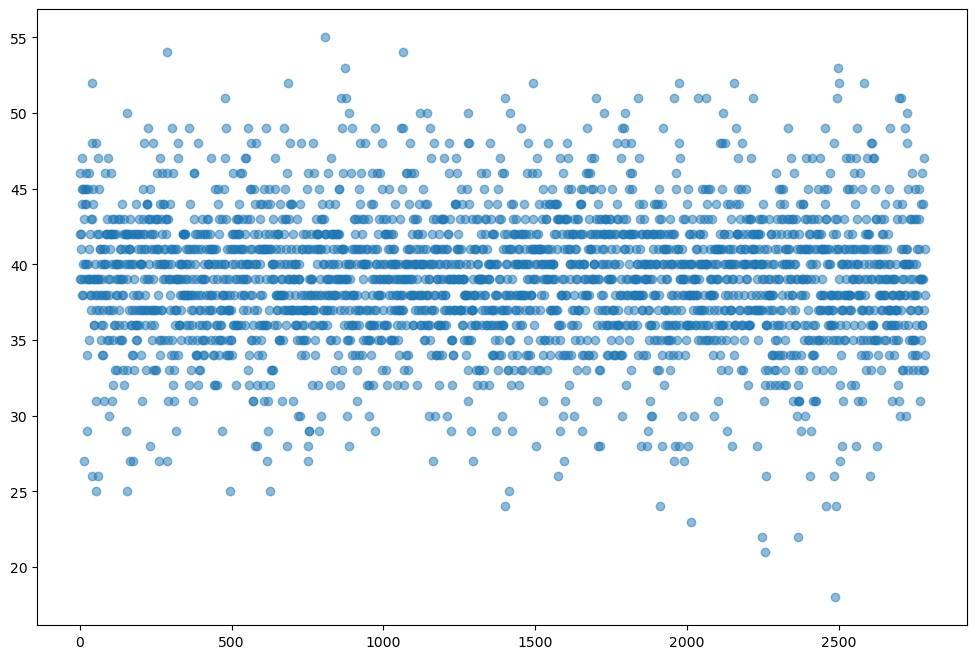

In [85]:
plt.figure(figsize=(12, 8))
plt.plot(df.llm_score, 'o', alpha=0.5)

### `각 정량적 변수 vs llm score 시각화`

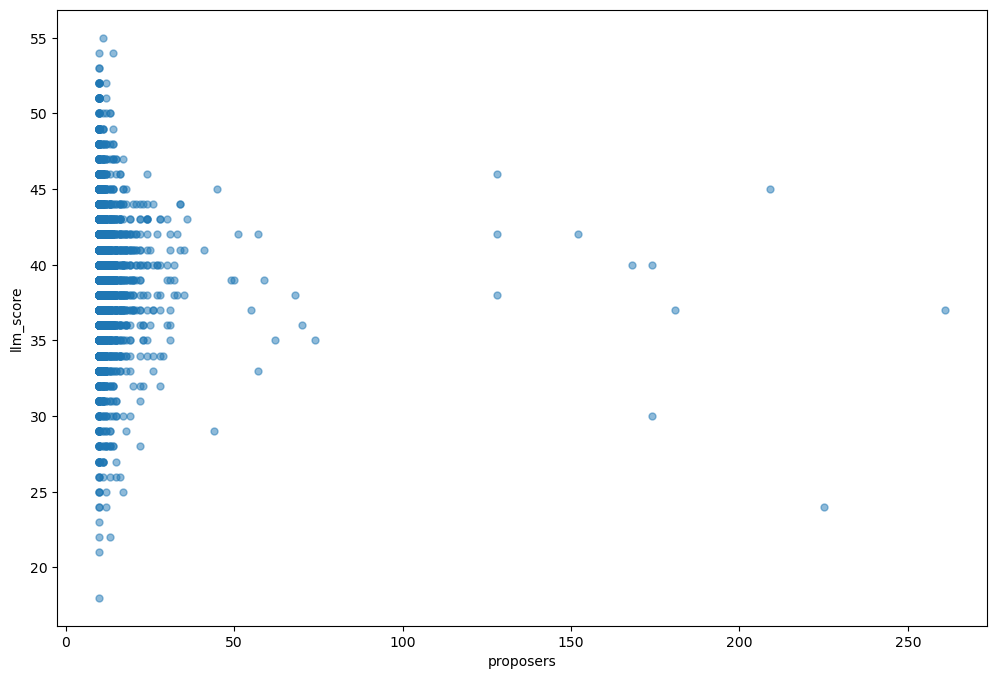

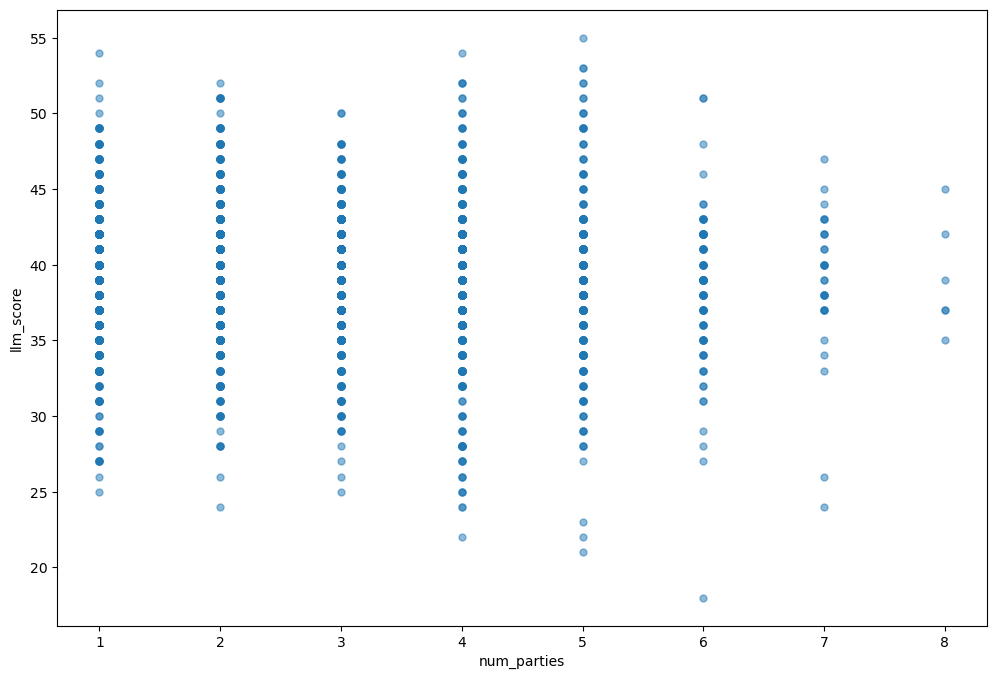

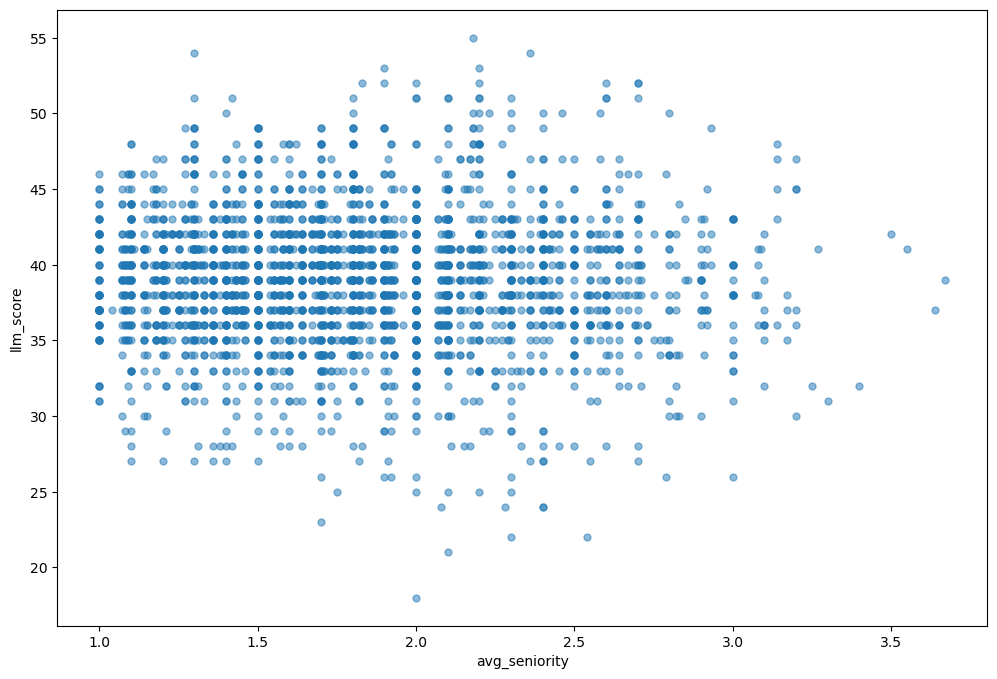

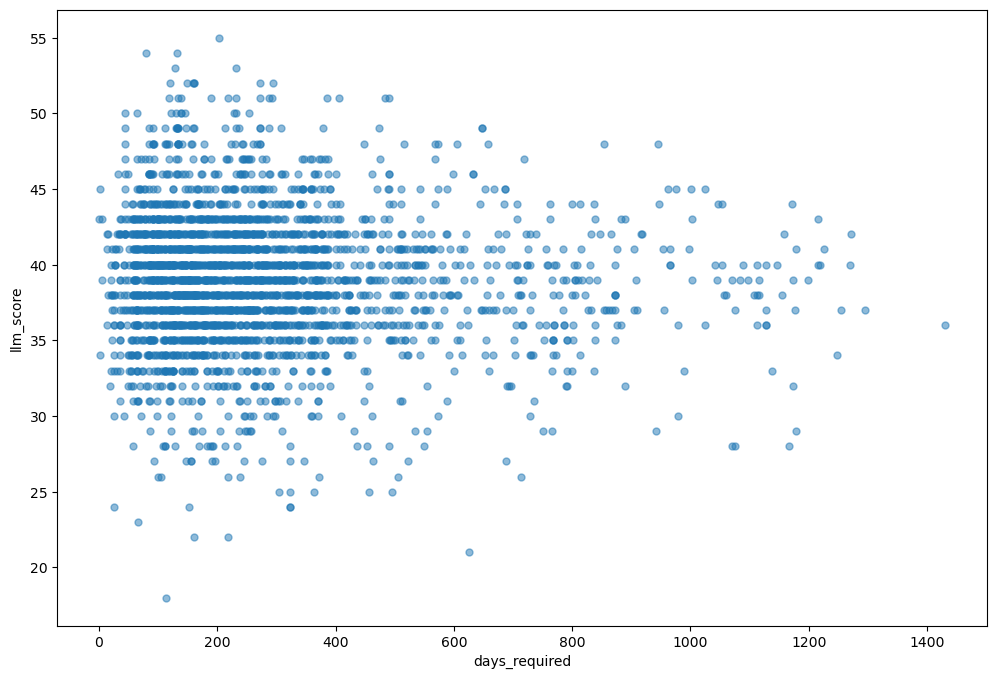

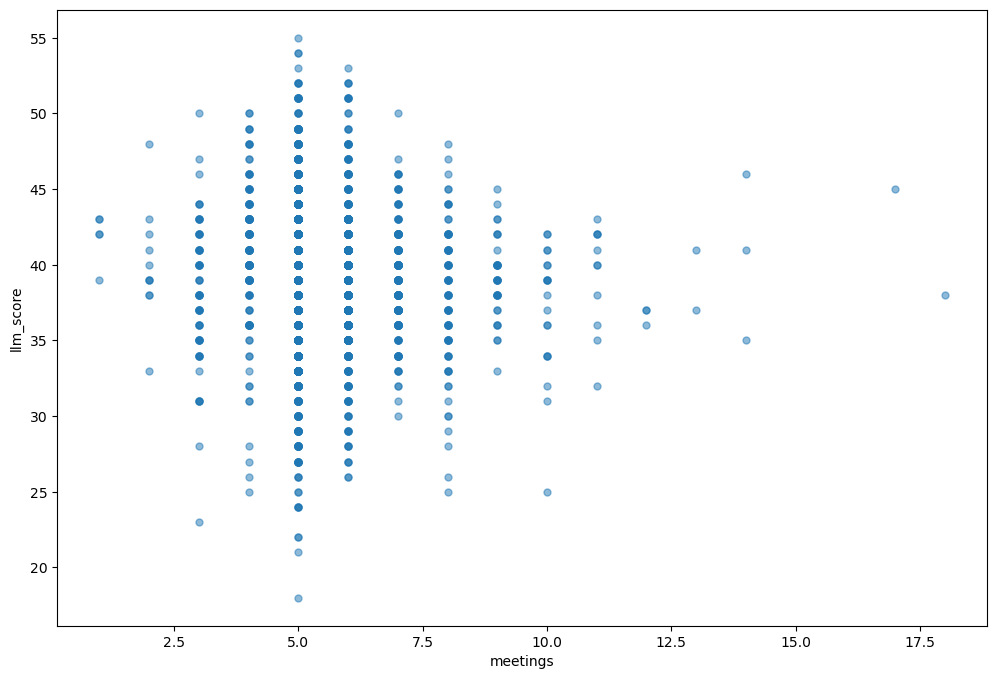

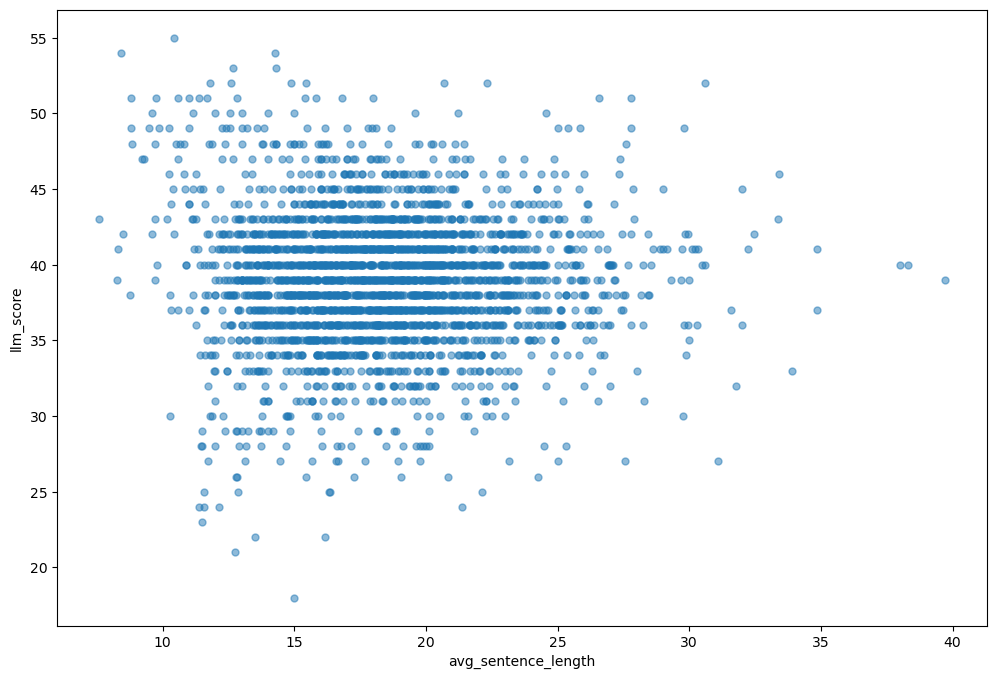

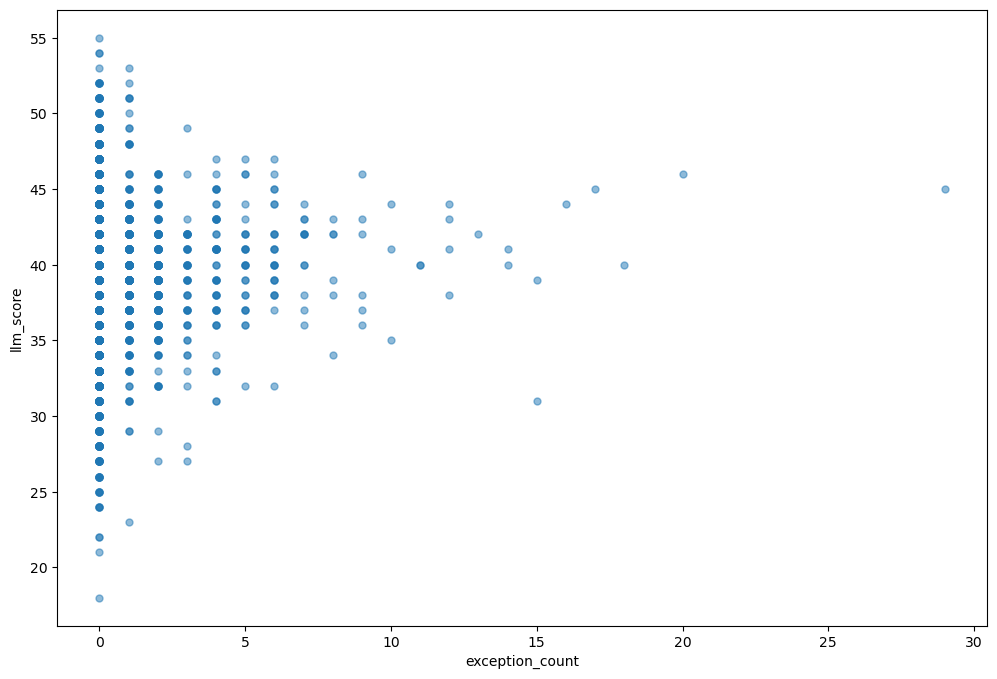

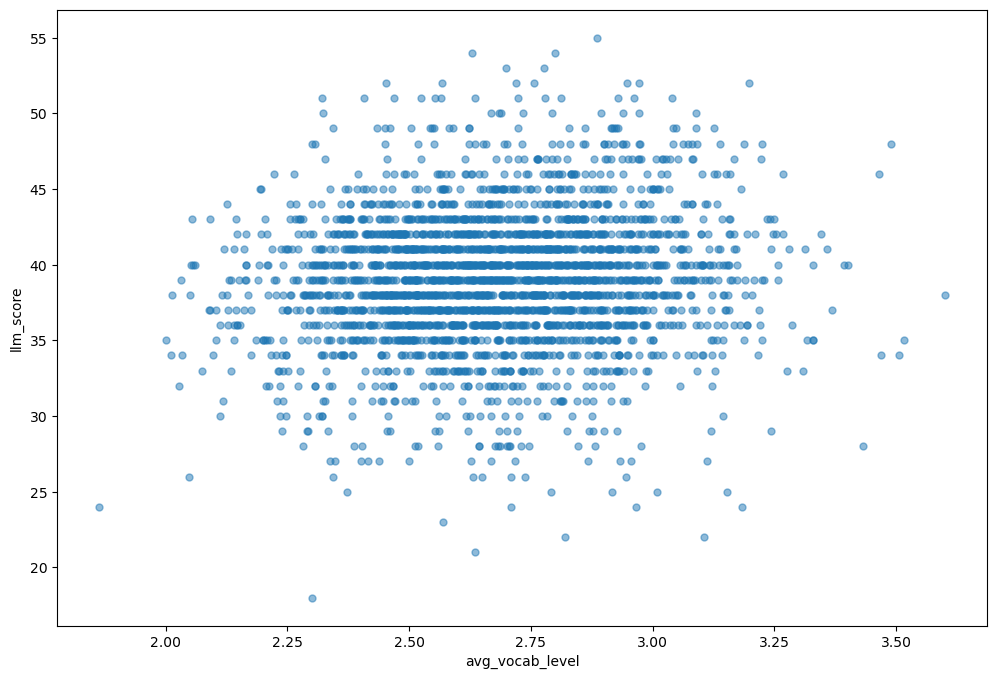

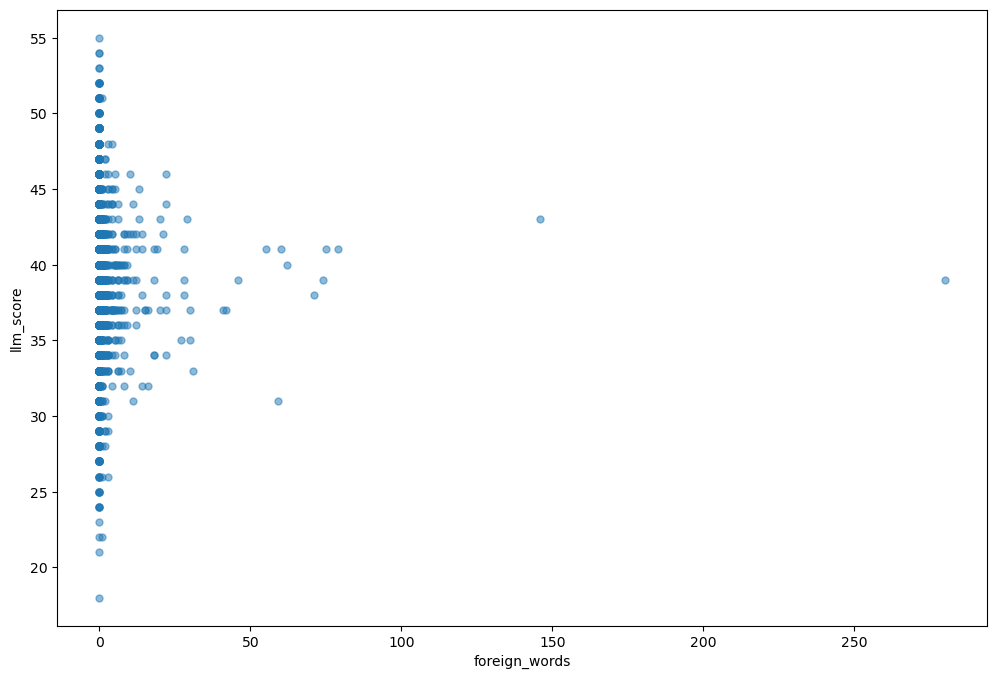

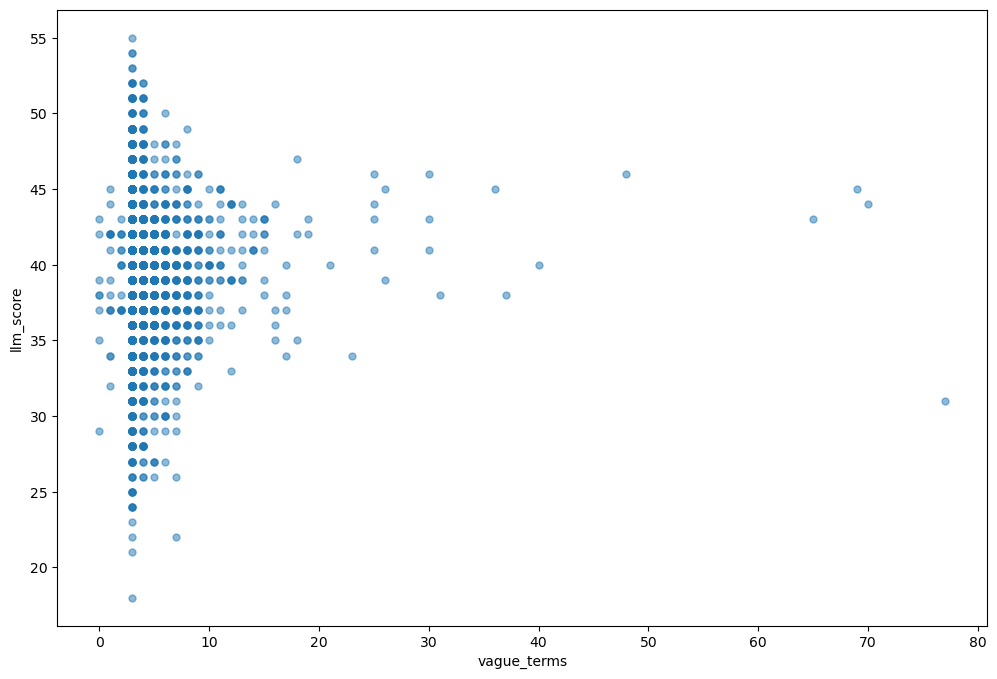

In [86]:

label_y = 'llm_score'
for label_x in df.columns[1:11]:
    plt.figure(figsize=(12, 8))
    plt.plot(df[label_x], df[label_y], 'o', markersize=5, alpha=0.5)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

### `20대, 21대 분할`

In [87]:
df_20 = df[df.bill_num.isin(bill_num_20)].reset_index(drop=True)
df_20

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
0,2005003,32.0,5,1.79,322,9,18.11,2,2.634,74,4,39
1,2016203,10.0,3,1.70,491,5,17.91,0,2.617,0,4,46
2,2018900,10.0,2,1.90,264,6,18.57,0,2.738,0,3,42
3,2015410,10.0,2,1.90,543,13,20.33,0,3.073,0,3,41
4,2016402,10.0,4,1.90,377,5,13.00,1,2.524,0,5,39
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2005535,10.0,5,2.20,273,5,21.43,0,2.901,0,3,48
1396,2003249,12.0,5,2.92,756,6,21.33,0,2.556,1,3,36
1397,2009885,11.0,6,2.45,103,5,22.47,2,2.583,0,8,40
1398,2009737,11.0,4,2.36,64,5,15.14,1,2.650,0,5,33


In [88]:
df_21 = df[df.bill_num.isin(bill_num_21)].reset_index(drop=True)
df_21

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
0,2106612,17.0,2,1.07,708,7,15.57,0,2.395,0,3,39
1,2107576,10.0,1,1.40,158,8,16.89,0,2.579,0,4,37
2,2122572,11.0,1,1.18,262,5,14.58,0,2.567,0,6,45
3,2106324,12.0,1,1.33,201,7,17.33,0,3.032,0,5,38
4,2121894,13.0,2,1.31,295,5,18.03,4,2.631,2,4,41
...,...,...,...,...,...,...,...,...,...,...,...,...
1380,2123356,11.0,1,1.64,196,7,17.44,1,2.403,0,3,37
1381,2119824,11.0,1,1.55,245,5,21.50,0,2.902,0,3,47
1382,2111999,10.0,2,2.00,120,5,16.11,0,2.689,1,4,41
1383,2117394,12.0,3,1.50,164,5,15.77,0,2.475,1,3,38


In [89]:
df_20.corr()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
bill_num,1.000000,0.004503,-0.189268,-0.135810,-0.105075,-0.167627,0.038170,0.048725,0.019784,0.014934,-0.011333,-0.063873
proposers,0.004503,1.000000,0.098876,0.036414,0.009691,0.104424,0.008258,0.054436,-0.027735,0.028198,0.003991,-0.031143
num_parties,-0.189268,0.098876,1.000000,-0.037746,-0.023169,-0.032387,-0.011901,0.033843,-0.036825,-0.005345,0.022101,-0.084618
avg_seniority,-0.135810,0.036414,-0.037746,1.000000,0.047838,0.113452,0.001059,-0.013854,-0.035378,0.023031,0.001429,-0.045342
days_required,-0.105075,0.009691,-0.023169,0.047838,1.000000,0.365388,0.029428,0.034597,0.025058,0.017323,0.058226,-0.050938
meetings,-0.167627,0.104424,-0.032387,0.113452,0.365388,1.000000,0.040240,0.048966,0.059017,0.022944,0.055851,-0.031620
avg_sentence_length,0.038170,0.008258,-0.011901,0.001059,0.029428,0.040240,1.000000,0.133022,-0.012499,0.037251,0.090685,0.013214
exception_count,0.048725,0.054436,0.033843,-0.013854,0.034597,0.048966,0.133022,1.000000,0.062436,0.128499,0.455674,0.062975
avg_vocab_level,0.019784,-0.027735,-0.036825,-0.035378,0.025058,0.059017,-0.012499,0.062436,1.000000,0.004129,0.053379,0.141125
foreign_words,0.014934,0.028198,-0.005345,0.023031,0.017323,0.022944,0.037251,0.128499,0.004129,1.000000,0.098749,-0.010994


In [90]:
df_21.corr()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
bill_num,1.000000,-0.052826,-0.241325,0.015597,0.007288,-0.087679,0.057681,0.019485,-0.002105,0.027639,0.069376,-0.020426
proposers,-0.052826,1.000000,0.130707,0.006508,-0.016821,0.028373,0.025668,0.026915,-0.035689,-0.002480,-0.017856,-0.032182
num_parties,-0.241325,0.130707,1.000000,-0.050881,0.007506,0.039689,0.012023,0.011505,-0.034551,0.031198,-0.026193,-0.039989
avg_seniority,0.015597,0.006508,-0.050881,1.000000,0.018237,0.017363,0.021734,-0.011600,0.027035,-0.026003,-0.048464,-0.021397
days_required,0.007288,-0.016821,0.007506,0.018237,1.000000,0.312676,0.017448,-0.025815,-0.084985,0.004224,-0.004195,-0.061591
meetings,-0.087679,0.028373,0.039689,0.017363,0.312676,1.000000,0.004069,0.035956,-0.006382,0.084092,0.052939,-0.067922
avg_sentence_length,0.057681,0.025668,0.012023,0.021734,0.017448,0.004069,1.000000,0.135358,0.057453,0.032040,0.149192,-0.065426
exception_count,0.019485,0.026915,0.011505,-0.011600,-0.025815,0.035956,0.135358,1.000000,0.030339,0.105409,0.590359,0.095986
avg_vocab_level,-0.002105,-0.035689,-0.034551,0.027035,-0.084985,-0.006382,0.057453,0.030339,1.000000,-0.027376,0.056335,0.074038
foreign_words,0.027639,-0.002480,0.031198,-0.026003,0.004224,0.084092,0.032040,0.105409,-0.027376,1.000000,0.139664,0.006788


### `입법 과정, 입법 문체 특성 분할`

In [91]:
df_progress = df[['bill_num', 'proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings', 'llm_score']]
df_text = df[['bill_num', 'avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms', 'llm_score']]
df_text

,bill_num,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score
0,2005003,18.11,2,2.634,74,4,39
1,2016203,17.91,0,2.617,0,4,46
2,2018900,18.57,0,2.738,0,3,42
3,2015410,20.33,0,3.073,0,3,41
4,2016402,13.00,1,2.524,0,5,39
...,...,...,...,...,...,...,...
2780,2123356,17.44,1,2.403,0,3,37
2781,2119824,21.50,0,2.902,0,3,47
2782,2111999,16.11,0,2.689,1,4,41
2783,2117394,15.77,0,2.475,1,3,38


In [92]:
silver_label[['bill_num', 'score_명확성_및_가독성']]

,bill_num,score_명확성_및_가독성
0,2000010,7
1,2000020,6
2,2000048,6
3,2000099,8
4,2000123,8
...,...,...
2780,2125137,8
2781,2125197,7
2782,2125389,8
2783,2125392,8


In [93]:
llm_score

,bill_num,llm_score
0,2000010,41
1,2000020,35
2,2000048,37
3,2000099,39
4,2000123,48
...,...,...
2780,2125137,39
2781,2125197,40
2782,2125389,42
2783,2125392,39


In [94]:
df_text = df_text.merge(silver_label[['bill_num', 'score_필요성_및_적합성', 'score_일관성_및_체계성', 'score_효과성_및_비례성', 'score_절차_및_근거_기반', 'score_영향력_및_지속가능성', 'score_명확성_및_가독성']])

In [95]:
df_text.head()

,bill_num,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score,score_필요성_및_적합성,score_일관성_및_체계성,score_효과성_및_비례성,score_절차_및_근거_기반,score_영향력_및_지속가능성,score_명확성_및_가독성
0,2005003,18.11,2,2.634,74,4,39,7.0,7,6,5,7,7
1,2016203,17.91,0,2.617,0,4,46,7.0,10,10,4,6,9
2,2018900,18.57,0,2.738,0,3,42,8.0,8,8,4,7,7
3,2015410,20.33,0,3.073,0,3,41,7.0,8,7,5,6,8
4,2016402,13.00,1,2.524,0,5,39,6.0,8,6,4,6,9


<Axes: >

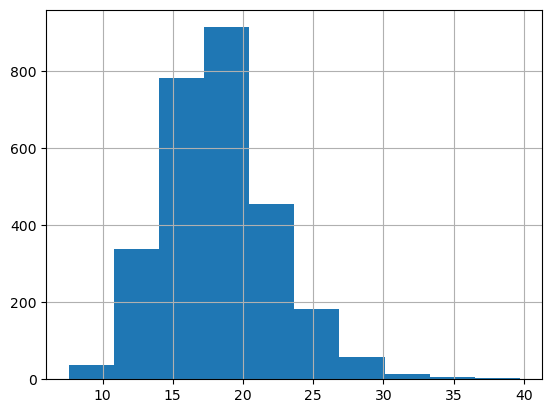

In [110]:
df_text.avg_sentence_length.hist()

In [96]:
df_text.columns = ['bill_num', 'avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms', 'llm_score', 'score_necessity', 'score_consistency', 'score_effectiveness', 'score_procedure', 'score_influence', 'score_readability']

In [101]:
df_text.describe()

,bill_num,avg_sentence_length,exception_count,avg_vocab_level,foreign_words,vague_terms,llm_score,score_necessity,score_consistency,score_effectiveness,score_procedure,score_influence,score_readability
count,2.785000e+03,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,2.060612e+06,18.347102,0.619031,2.676954,1.046679,4.313465,38.976302,7.057810,7.577379,6.719928,4.038061,6.135727,7.445601
std,5.070982e+04,3.978631,1.734620,0.241952,7.540216,3.826300,4.402375,0.829956,1.133917,1.056511,0.991336,0.790727,1.243374
min,2.000010e+06,7.600000,0.000000,1.864000,0.000000,0.000000,18.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
25%,2.009628e+06,15.660000,0.000000,2.506000,0.000000,3.000000,36.000000,7.000000,7.000000,6.000000,3.000000,6.000000,7.000000
50%,2.024420e+06,18.090000,0.000000,2.670000,0.000000,3.000000,39.000000,7.000000,8.000000,7.000000,4.000000,6.000000,7.000000
75%,2.110297e+06,20.560000,0.000000,2.842000,0.000000,4.000000,42.000000,8.000000,8.000000,7.000000,4.000000,7.000000,8.000000
max,2.126661e+06,39.710000,29.000000,3.600000,280.000000,77.000000,55.000000,9.000000,10.000000,10.000000,8.000000,8.000000,10.000000


### `낮은 품질 점수 예시`

In [98]:
silver_label.columns

Index(['bill_num', 'overall_score', 'notes', 'score_필요성_및_적합성',
       'rationale_필요성_및_적합성', 'score_일관성_및_체계성', 'rationale_일관성_및_체계성',
       'score_효과성_및_비례성', 'rationale_효과성_및_비례성', 'score_절차_및_근거_기반',
       'rationale_절차_및_근거_기반', 'score_영향력_및_지속가능성', 'rationale_영향력_및_지속가능성',
       'score_명확성_및_가독성', 'rationale_명확성_및_가독성', 'score_필요일성_및_적합성',
       'rationale_필요일성_및_적합성'],
      dtype='object')

In [99]:
silver_label[['bill_num', 'score_필요성_및_적합성', 'rationale_필요성_및_적합성']].sort_values('score_필요성_및_적합성')

,bill_num,score_필요성_및_적합성,rationale_필요성_및_적합성
1388,2024069,2.0,제안이유는 산림사업에 ‘사회보험료와 법령상 각종 부담금의 금액과 부담방법’을 명시하...
1134,2017983,3.0,제안이유는 “정부의 손실보전 규정은 … 방만한 경영을 초래할 수 있음”이라 문제의식...
1172,2018830,3.0,"제안이유는 ‘유사한 위반행위에 대한 법정형의 편차’(제안이유) 해소를 목표로 하나,..."
1788,2105669,3.0,"제안이유는 “수도권인구가 … 50%를 넘어서고, 소멸위기에 놓인 지방자치단체가 증가..."
593,2007888,3.0,"제안이유는 ‘법정형 편차 조정’과 ‘위헌성 제거’를 주장하지만, 어떤 법률과의 비교..."
...,...,...,...
1730,2105143,9.0,제안이유에서 2011년 국제회계기준(IFRS) 도입에 따라 기업회계 용어가 '재무상...
1749,2105274,9.0,제안이유는 2011년 국제회계기준 도입으로 공식 용어가 ‘대차대조표’에서 ‘재무상태...
1820,2105902,9.0,제안이유에서 ‘형사소송법’ 개정으로 “사법경찰관에게도 1차적 수사종결권”이 부여되었...
1908,2107073,9.0,제안이유에서 2019년 보행자 사망 비중 39% 및 ‘보도가 없는 도로’ 연평균 사...


## `가설 검정`

### `가설 1: df_text`

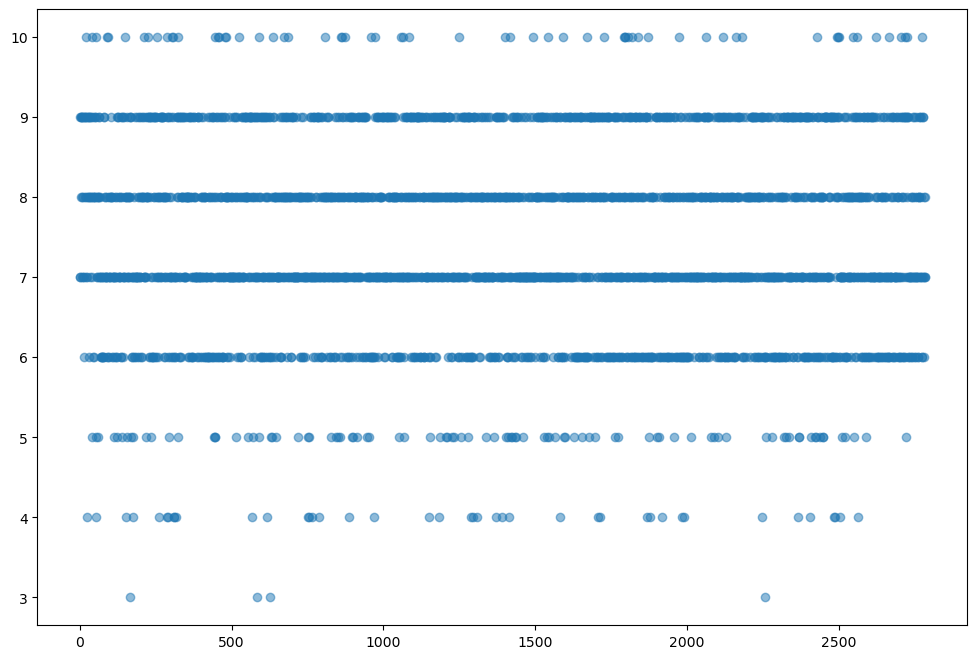

In [100]:
plt.figure(figsize=(12, 8))
plt.plot(df_text.score_readability, 'o', alpha=0.5)

In [102]:
df_text['score_readability'].value_counts()

score_readability
7     862
8     670
9     585
6     466
5      93
10     64
4      41
3       4
Name: count, dtype: int64

In [103]:
df_text.columns

Index(['bill_num', 'avg_sentence_length', 'exception_count', 'avg_vocab_level',
       'foreign_words', 'vague_terms', 'llm_score', 'score_necessity',
       'score_consistency', 'score_effectiveness', 'score_procedure',
       'score_influence', 'score_readability'],
      dtype='object')

### `가설 1-1: y(필요성 및 적합성) ~ X`

In [104]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_necessity'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.588 ± 0.025
CV F1 : 0.547 ± 0.028
Test Acc: 0.589
Test F1: 0.548
Confusion Matrix [rows=true low/high, cols=pred]:
[[248 153]
 [ 76  80]]

=== RandomForest ===
CV Acc: 0.594 ± 0.024
CV F1 : 0.558 ± 0.020
Test Acc: 0.567
Test F1: 0.538
Confusion Matrix [rows=true low/high, cols=pred]:
[[228 173]
 [ 68  88]]

=== SVC ===
CV Acc: 0.605 ± 0.021
CV F1 : 0.552 ± 0.023
Test Acc: 0.618
Test F1: 0.566
Confusion Matrix [rows=true low/high, cols=pred]:
[[268 133]
 [ 80  76]]

=== ExtraTree ===
CV Acc: 0.602 ± 0.013
CV F1 : 0.555 ± 0.013
Test Acc: 0.607
Test F1: 0.556
Confusion Matrix [rows=true low/high, cols=pred]:
[[263 138]
 [ 81  75]]


#### `permutation f1 score -> pkl 저장`

In [105]:
from sklearn.base import clone
import pickle

In [106]:
# def get_permutation_f1_macro_scores(
#     model,
#     X_train,
#     y_train,
#     X_test,
#     y_test,
#     n_permutations=1000,
#     random_state=0,
# ):
#     """
#     주어진 모델에 대해, y_train을 n_permutations번 셔플하면서
#     test F1-macro의 null 분포(permutation 분포)를 만드는 함수.

#     return: perm_scores (shape = (n_permutations,))
#     """
#     rng = np.random.default_rng(random_state)
#     perm_scores = np.zeros(n_permutations)

#     for i in range(n_permutations):
#         # 1) train 라벨 셔플
#         y_train_perm = rng.permutation(y_train)

#         # 2) 모델 복제 후, 무작위 라벨로 학습
#         perm_model = clone(model)
#         perm_model.fit(X_train, y_train_perm)

#         # 3) test F1-macro 계산
#         y_perm_pred = perm_model.predict(X_test)
#         perm_scores[i] = f1_score(y_test, y_perm_pred, average="macro")

#     return perm_scores


In [107]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_1_1.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_1_1.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [108]:
with open("perm_results_1_1.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [109]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [110]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.04395604395604396


In [111]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.016983016983016984


In [112]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.03996003996003996


In [113]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.026973026973026972)

- 모두 기각

### `가설 1-2: y(일관성 및 체계성) ~ X`

In [114]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_consistency'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.568 ± 0.017
CV F1 : 0.562 ± 0.017
Test Acc: 0.566
Test F1: 0.558
Confusion Matrix [rows=true low/high, cols=pred]:
[[120 116]
 [126 195]]

=== RandomForest ===
CV Acc: 0.557 ± 0.022
CV F1 : 0.557 ± 0.022
Test Acc: 0.521
Test F1: 0.521
Confusion Matrix [rows=true low/high, cols=pred]:
[[142  94]
 [173 148]]

=== SVC ===
CV Acc: 0.568 ± 0.018
CV F1 : 0.562 ± 0.017
Test Acc: 0.569
Test F1: 0.561
Confusion Matrix [rows=true low/high, cols=pred]:
[[121 115]
 [125 196]]

=== ExtraTree ===
CV Acc: 0.559 ± 0.024
CV F1 : 0.558 ± 0.025
Test Acc: 0.533
Test F1: 0.531
Confusion Matrix [rows=true low/high, cols=pred]:
[[131 105]
 [155 166]]


In [115]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_1_2.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_1_2.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [116]:
with open("perm_results_1_2.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [117]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [118]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.04195804195804196


In [119]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.011988011988011988


In [120]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.18581418581418582


In [121]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.12287712287712288)

### `가설 1-3: 효과성 및 비례성`

In [122]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_effectiveness'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 6:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.576 ± 0.018
CV F1 : 0.575 ± 0.017
Test Acc: 0.542
Test F1: 0.541
Confusion Matrix [rows=true low/high, cols=pred]:
[[135  99]
 [156 167]]

=== RandomForest ===
CV Acc: 0.577 ± 0.014
CV F1 : 0.575 ± 0.013
Test Acc: 0.569
Test F1: 0.569
Confusion Matrix [rows=true low/high, cols=pred]:
[[153  81]
 [159 164]]

=== SVC ===
CV Acc: 0.566 ± 0.017
CV F1 : 0.565 ± 0.017
Test Acc: 0.551
Test F1: 0.550
Confusion Matrix [rows=true low/high, cols=pred]:
[[138  96]
 [154 169]]

=== ExtraTree ===
CV Acc: 0.571 ± 0.021
CV F1 : 0.571 ± 0.021
Test Acc: 0.562
Test F1: 0.562
Confusion Matrix [rows=true low/high, cols=pred]:
[[149  85]
 [159 164]]


In [123]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_1_3.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_1_3.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [124]:
with open("perm_results_1_3.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [125]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [126]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.11388611388611389


In [127]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.03996003996003996


In [128]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.013986013986013986


In [129]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.025974025974025976)

### `가설 1-4: 절차 및 근거 기반`

In [130]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_procedure'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 3:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.514 ± 0.015
CV F1 : 0.509 ± 0.016
Test Acc: 0.555
Test F1: 0.550
Confusion Matrix [rows=true low/high, cols=pred]:
[[125  51]
 [197 184]]

=== RandomForest ===
CV Acc: 0.586 ± 0.017
CV F1 : 0.549 ± 0.017
Test Acc: 0.585
Test F1: 0.554
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 89  87]
 [144 237]]

=== SVC ===
CV Acc: 0.471 ± 0.008
CV F1 : 0.470 ± 0.008
Test Acc: 0.544
Test F1: 0.544
Confusion Matrix [rows=true low/high, cols=pred]:
[[144  32]
 [222 159]]

=== ExtraTree ===
CV Acc: 0.549 ± 0.015
CV F1 : 0.539 ± 0.014
Test Acc: 0.583
Test F1: 0.573
Confusion Matrix [rows=true low/high, cols=pred]:
[[118  58]
 [174 207]]


In [131]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_1_4.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_1_4.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [132]:
with open("perm_results_1_4.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [133]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [134]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.04595404595404595


In [135]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.030969030969030968


In [136]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.03196803196803197


In [137]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.004995004995004995)

### `가설 1-5: 영향력 및 지속 가능성`

In [138]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_influence'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 6:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.613 ± 0.014
CV F1 : 0.573 ± 0.015
Test Acc: 0.601
Test F1: 0.563
Confusion Matrix [rows=true low/high, cols=pred]:
[[250 129]
 [ 93  85]]

=== RandomForest ===
CV Acc: 0.605 ± 0.006
CV F1 : 0.566 ± 0.015
Test Acc: 0.583
Test F1: 0.555
Confusion Matrix [rows=true low/high, cols=pred]:
[[233 146]
 [ 86  92]]

=== SVC ===
CV Acc: 0.625 ± 0.024
CV F1 : 0.572 ± 0.024
Test Acc: 0.609
Test F1: 0.559
Confusion Matrix [rows=true low/high, cols=pred]:
[[263 116]
 [102  76]]

=== ExtraTree ===
CV Acc: 0.627 ± 0.013
CV F1 : 0.581 ± 0.015
Test Acc: 0.609
Test F1: 0.558
Confusion Matrix [rows=true low/high, cols=pred]:
[[264 115]
 [103  75]]


In [139]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_1_5.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_1_5.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [140]:
with open("perm_results_1_5.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [141]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [142]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.030969030969030968


In [143]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.008991008991008992


In [144]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.027972027972027972


In [145]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.04895104895104895)

### `가설 1-6: 명확성 및 가독성`

In [146]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.601 ± 0.014
CV F1 : 0.600 ± 0.014
Test Acc: 0.637
Test F1: 0.637
Confusion Matrix [rows=true low/high, cols=pred]:
[[175 118]
 [ 84 180]]

=== RandomForest ===
CV Acc: 0.613 ± 0.016
CV F1 : 0.609 ± 0.018
Test Acc: 0.657
Test F1: 0.655
Confusion Matrix [rows=true low/high, cols=pred]:
[[206  87]
 [104 160]]

=== SVC ===
CV Acc: 0.594 ± 0.011
CV F1 : 0.594 ± 0.011
Test Acc: 0.630
Test F1: 0.630
Confusion Matrix [rows=true low/high, cols=pred]:
[[169 124]
 [ 82 182]]

=== ExtraTree ===
CV Acc: 0.601 ± 0.014
CV F1 : 0.600 ± 0.015
Test Acc: 0.646
Test F1: 0.646
Confusion Matrix [rows=true low/high, cols=pred]:
[[192 101]
 [ 96 168]]


In [147]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_1_6.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_1_6.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [148]:
with open("perm_results_1_6.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [149]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [150]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.011988011988011988


In [151]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.001998001998001998


In [152]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.000999000999000999


In [153]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.002997002997002997)

- 모두 기각

In [154]:
feature_names = FEATURES

In [155]:
lr = models["LogisticRegression"].named_steps["clf"]
lr_coef = lr.coef_[0]

importance_lr = pd.DataFrame({
    "feature": feature_names,
    "coefficient": lr_coef
}).sort_values("coefficient", ascending=False)

print("\n[Logistic Regression coefficients]")
print(importance_lr)


[Logistic Regression coefficients]
               feature  coefficient
2      avg_vocab_level     0.210228
4          vague_terms    -0.076345
1      exception_count    -0.124296
3        foreign_words    -0.232560
0  avg_sentence_length    -0.384345


In [156]:
svc_model = models["SVC"].named_steps["clf"]

# kernel="linear"일 때만 .coef_ 속성이 존재합니다.
svc_coef = svc_model.coef_[0]

importance_svc = pd.DataFrame({
    "feature": feature_names,
    "coefficient": svc_coef/sum(np.abs(svc_coef))
}).sort_values("coefficient", ascending=False)

print("\n[SVC (Linear Kernel) coefficients]")
print(importance_svc)


[SVC (Linear Kernel) coefficients]
               feature  coefficient
2      avg_vocab_level     0.210182
4          vague_terms    -0.068728
1      exception_count    -0.115580
3        foreign_words    -0.224098
0  avg_sentence_length    -0.381412


In [157]:
rf = models["RandomForest"]
rf_imp = rf.feature_importances_

importance_rf = pd.DataFrame({
    "feature": feature_names,
    "importance": rf_imp
}).sort_values("importance", ascending=False)

print("\n[Random Forest feature importance]")
print(importance_rf)



[Random Forest feature importance]
               feature  importance
0  avg_sentence_length    0.411691
3        foreign_words    0.211924
2      avg_vocab_level    0.203986
4          vague_terms    0.102258
1      exception_count    0.070140


In [158]:
# et = models["ExtraTree"]
et = models["ExtraTree"]
et_coef = et.feature_importances_

importance_et = pd.DataFrame({
    "feature": feature_names,
    "coefficient": et_coef
}).sort_values("coefficient", ascending=False)

print("\n[ExtraTree feature coefficients]")
print(importance_et)


[ExtraTree feature coefficients]
               feature  coefficient
0  avg_sentence_length     0.456111
3        foreign_words     0.170833
2      avg_vocab_level     0.139879
1      exception_count     0.137028
4          vague_terms     0.096150


#### `ablation test`

##### `문장 길이 제거`

In [159]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['exception_count', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.550 ± 0.017
CV F1 : 0.550 ± 0.017
Test Acc: 0.526
Test F1: 0.525
Confusion Matrix [rows=true low/high, cols=pred]:
[[136 157]
 [107 157]]

=== RandomForest ===
CV Acc: 0.582 ± 0.012
CV F1 : 0.575 ± 0.010
Test Acc: 0.573
Test F1: 0.566
Confusion Matrix [rows=true low/high, cols=pred]:
[[124 169]
 [ 69 195]]

=== SVC ===
CV Acc: 0.549 ± 0.021
CV F1 : 0.546 ± 0.023
Test Acc: 0.519
Test F1: 0.517
Confusion Matrix [rows=true low/high, cols=pred]:
[[126 167]
 [101 163]]

=== ExtraTree ===
CV Acc: 0.573 ± 0.018
CV F1 : 0.570 ± 0.018
Test Acc: 0.582
Test F1: 0.577
Confusion Matrix [rows=true low/high, cols=pred]:
[[132 161]
 [ 72 192]]


##### `외국어 사용 빈도 제거`

In [160]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'vague_terms']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.592 ± 0.011
CV F1 : 0.592 ± 0.011
Test Acc: 0.623
Test F1: 0.623
Confusion Matrix [rows=true low/high, cols=pred]:
[[172 121]
 [ 89 175]]

=== RandomForest ===
CV Acc: 0.593 ± 0.010
CV F1 : 0.587 ± 0.012
Test Acc: 0.641
Test F1: 0.637
Confusion Matrix [rows=true low/high, cols=pred]:
[[207  86]
 [114 150]]

=== SVC ===
CV Acc: 0.587 ± 0.016
CV F1 : 0.587 ± 0.016
Test Acc: 0.627
Test F1: 0.626
Confusion Matrix [rows=true low/high, cols=pred]:
[[170 123]
 [ 85 179]]

=== ExtraTree ===
CV Acc: 0.592 ± 0.015
CV F1 : 0.590 ± 0.016
Test Acc: 0.641
Test F1: 0.640
Confusion Matrix [rows=true low/high, cols=pred]:
[[191 102]
 [ 98 166]]


##### `어휘 등급 제거`

In [161]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'foreign_words', 'vague_terms']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.580 ± 0.020
CV F1 : 0.579 ± 0.019
Test Acc: 0.650
Test F1: 0.649
Confusion Matrix [rows=true low/high, cols=pred]:
[[166 127]
 [ 68 196]]

=== RandomForest ===
CV Acc: 0.603 ± 0.007
CV F1 : 0.596 ± 0.011
Test Acc: 0.654
Test F1: 0.650
Confusion Matrix [rows=true low/high, cols=pred]:
[[209  84]
 [109 155]]

=== SVC ===
CV Acc: 0.579 ± 0.018
CV F1 : 0.577 ± 0.017
Test Acc: 0.652
Test F1: 0.650
Confusion Matrix [rows=true low/high, cols=pred]:
[[161 132]
 [ 62 202]]

=== ExtraTree ===
CV Acc: 0.592 ± 0.024
CV F1 : 0.590 ± 0.025
Test Acc: 0.646
Test F1: 0.646
Confusion Matrix [rows=true low/high, cols=pred]:
[[186 107]
 [ 90 174]]


##### `모호표현 사용 빈도 제거`

In [162]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'exception_count', 'avg_vocab_level', 'foreign_words']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.597 ± 0.014
CV F1 : 0.596 ± 0.013
Test Acc: 0.632
Test F1: 0.632
Confusion Matrix [rows=true low/high, cols=pred]:
[[175 118]
 [ 87 177]]

=== RandomForest ===
CV Acc: 0.604 ± 0.008
CV F1 : 0.600 ± 0.010
Test Acc: 0.655
Test F1: 0.653
Confusion Matrix [rows=true low/high, cols=pred]:
[[207  86]
 [106 158]]

=== SVC ===
CV Acc: 0.598 ± 0.015
CV F1 : 0.597 ± 0.015
Test Acc: 0.632
Test F1: 0.632
Confusion Matrix [rows=true low/high, cols=pred]:
[[170 123]
 [ 82 182]]

=== ExtraTree ===
CV Acc: 0.600 ± 0.015
CV F1 : 0.598 ± 0.015
Test Acc: 0.655
Test F1: 0.655
Confusion Matrix [rows=true low/high, cols=pred]:
[[193 100]
 [ 92 172]]


##### `역접/예외표현 빈도 제거`

In [163]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length', 'avg_vocab_level', 'foreign_words', 'vague_terms']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.600 ± 0.011
CV F1 : 0.600 ± 0.011
Test Acc: 0.628
Test F1: 0.628
Confusion Matrix [rows=true low/high, cols=pred]:
[[172 121]
 [ 86 178]]

=== RandomForest ===
CV Acc: 0.611 ± 0.021
CV F1 : 0.606 ± 0.023
Test Acc: 0.657
Test F1: 0.654
Confusion Matrix [rows=true low/high, cols=pred]:
[[208  85]
 [106 158]]

=== SVC ===
CV Acc: 0.599 ± 0.010
CV F1 : 0.598 ± 0.010
Test Acc: 0.628
Test F1: 0.628
Confusion Matrix [rows=true low/high, cols=pred]:
[[167 126]
 [ 81 183]]

=== ExtraTree ===
CV Acc: 0.605 ± 0.014
CV F1 : 0.602 ± 0.015
Test Acc: 0.639
Test F1: 0.638
Confusion Matrix [rows=true low/high, cols=pred]:
[[190 103]
 [ 98 166]]


##### `문장길이만 사용`

In [164]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['avg_sentence_length']
TARGET = 'score_readability'

X = df_text[FEATURES].copy()
y_raw = df_text[TARGET].astype(int)

# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.582 ± 0.032
CV F1 : 0.582 ± 0.032
Test Acc: 0.646
Test F1: 0.646
Confusion Matrix [rows=true low/high, cols=pred]:
[[175 118]
 [ 79 185]]

=== RandomForest ===
CV Acc: 0.588 ± 0.016
CV F1 : 0.582 ± 0.017
Test Acc: 0.641
Test F1: 0.638
Confusion Matrix [rows=true low/high, cols=pred]:
[[202  91]
 [109 155]]

=== SVC ===
CV Acc: 0.579 ± 0.029
CV F1 : 0.579 ± 0.029
Test Acc: 0.643
Test F1: 0.642
Confusion Matrix [rows=true low/high, cols=pred]:
[[169 124]
 [ 75 189]]

=== ExtraTree ===
CV Acc: 0.591 ± 0.037
CV F1 : 0.586 ± 0.038
Test Acc: 0.668
Test F1: 0.666
Confusion Matrix [rows=true low/high, cols=pred]:
[[205  88]
 [ 97 167]]


### `가설 2: df_progress`

In [102]:
silver_label.columns

Index(['bill_num', 'overall_score', 'notes', 'score_필요성_및_적합성',
       'rationale_필요성_및_적합성', 'score_일관성_및_체계성', 'rationale_일관성_및_체계성',
       'score_효과성_및_비례성', 'rationale_효과성_및_비례성', 'score_절차_및_근거_기반',
       'rationale_절차_및_근거_기반', 'score_영향력_및_지속가능성', 'rationale_영향력_및_지속가능성',
       'score_명확성_및_가독성', 'rationale_명확성_및_가독성', 'score_필요일성_및_적합성',
       'rationale_필요일성_및_적합성'],
      dtype='object')

In [103]:
df_progress = df_progress.merge(silver_label[['bill_num', 'score_필요성_및_적합성', 'score_일관성_및_체계성', 'score_효과성_및_비례성', 'score_절차_및_근거_기반', 'score_영향력_및_지속가능성', 'score_명확성_및_가독성']])

In [104]:
df_progress.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,llm_score,score_필요성_및_적합성,score_일관성_및_체계성,score_효과성_및_비례성,score_절차_및_근거_기반,score_영향력_및_지속가능성,score_명확성_및_가독성
0,2005003,32.0,5,1.79,322,9,39,7.0,7,6,5,7,7
1,2016203,10.0,3,1.70,491,5,46,7.0,10,10,4,6,9
2,2018900,10.0,2,1.90,264,6,42,8.0,8,8,4,7,7
3,2015410,10.0,2,1.90,543,13,41,7.0,8,7,5,6,8
4,2016402,10.0,4,1.90,377,5,39,6.0,8,6,4,6,9


In [105]:
df_progress.columns = ['bill_num', 'proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings', 'llm_score', 'score_necessity', 'score_consistency', 'score_effectiveness', 'score_procedure', 'score_influence', 'score_readability']

In [106]:
df_progress.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,llm_score,score_necessity,score_consistency,score_effectiveness,score_procedure,score_influence,score_readability
0,2005003,32.0,5,1.79,322,9,39,7.0,7,6,5,7,7
1,2016203,10.0,3,1.70,491,5,46,7.0,10,10,4,6,9
2,2018900,10.0,2,1.90,264,6,42,8.0,8,8,4,7,7
3,2015410,10.0,2,1.90,543,13,41,7.0,8,7,5,6,8
4,2016402,10.0,4,1.90,377,5,39,6.0,8,6,4,6,9


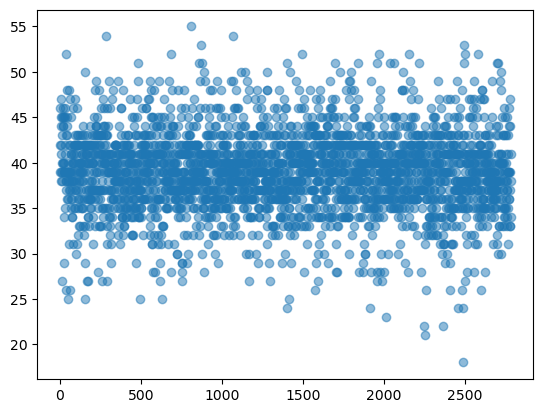

In [107]:
plt.plot(df_progress.llm_score, 'o', alpha=0.5)

In [108]:
df_progress.head()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,llm_score,score_necessity,score_consistency,score_effectiveness,score_procedure,score_influence,score_readability
0,2005003,32.0,5,1.79,322,9,39,7.0,7,6,5,7,7
1,2016203,10.0,3,1.70,491,5,46,7.0,10,10,4,6,9
2,2018900,10.0,2,1.90,264,6,42,8.0,8,8,4,7,7
3,2015410,10.0,2,1.90,543,13,41,7.0,8,7,5,6,8
4,2016402,10.0,4,1.90,377,5,39,6.0,8,6,4,6,9


In [109]:
df_progress.describe()

,bill_num,proposers,num_parties,avg_seniority,days_required,meetings,llm_score,score_necessity,score_consistency,score_effectiveness,score_procedure,score_influence,score_readability
count,2.785000e+03,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,2.060612e+06,12.834470,2.893716,1.819311,278.115619,5.436984,38.976302,7.057810,7.577379,6.719928,4.038061,6.135727,7.445601
std,5.070982e+04,11.513184,1.479086,0.496241,217.873118,1.250458,4.402375,0.829956,1.133917,1.056511,0.991336,0.790727,1.243374
min,2.000010e+06,10.000000,1.000000,1.000000,1.000000,1.000000,18.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000
25%,2.009628e+06,10.000000,2.000000,1.430000,132.000000,5.000000,36.000000,7.000000,7.000000,6.000000,3.000000,6.000000,7.000000
50%,2.024420e+06,11.000000,3.000000,1.770000,221.000000,5.000000,39.000000,7.000000,8.000000,7.000000,4.000000,6.000000,7.000000
75%,2.110297e+06,12.000000,4.000000,2.140000,345.000000,6.000000,42.000000,8.000000,8.000000,7.000000,4.000000,7.000000,8.000000
max,2.126661e+06,261.000000,8.000000,3.670000,1430.000000,18.000000,55.000000,9.000000,10.000000,10.000000,8.000000,8.000000,10.000000


### `가설 2-1: 필요성 및 적합성`

In [172]:
df_progress.score_necessity.value_counts().reset_index().sort_values('score_necessity', ascending=False)

,score_necessity,count
3,9.0,55
1,8.0,726
0,7.0,1437
2,6.0,497
4,5.0,38
5,4.0,27
6,3.0,4
7,2.0,1


In [173]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings']
TARGET = 'score_necessity'

X = df_progress[FEATURES].copy()
y_raw = df_progress[TARGET].astype(int)


# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.509 ± 0.013
CV F1 : 0.486 ± 0.014
Test Acc: 0.519
Test F1: 0.501
Confusion Matrix [rows=true low/high, cols=pred]:
[[197 204]
 [ 64  92]]

=== RandomForest ===
CV Acc: 0.578 ± 0.032
CV F1 : 0.529 ± 0.028
Test Acc: 0.575
Test F1: 0.538
Confusion Matrix [rows=true low/high, cols=pred]:
[[238 163]
 [ 74  82]]

=== SVC ===
CV Acc: 0.468 ± 0.018
CV F1 : 0.462 ± 0.016
Test Acc: 0.483
Test F1: 0.478
Confusion Matrix [rows=true low/high, cols=pred]:
[[162 239]
 [ 49 107]]

=== ExtraTree ===
CV Acc: 0.552 ± 0.035
CV F1 : 0.516 ± 0.028
Test Acc: 0.544
Test F1: 0.515
Confusion Matrix [rows=true low/high, cols=pred]:
[[220 181]
 [ 73  83]]


In [174]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_2_1.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_2_1.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [175]:
with open("perm_results_2_1.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [176]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [177]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.054945054945054944


In [178]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.2677322677322677


In [179]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.023976023976023976


In [180]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.054945054945054944)

### `가설 2-2: 일관성 및 체계성`

In [181]:
df_progress.score_consistency.value_counts().reset_index().sort_values('score_consistency', ascending=False)

,score_consistency,count
5,10,44
2,9,511
0,8,1051
1,7,744
3,6,314
4,5,86
6,4,30
7,3,4
8,2,1


In [182]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings']
TARGET = 'score_consistency'

X = df_progress[FEATURES].copy()
y_raw = df_progress[TARGET].astype(int)


# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.552 ± 0.028
CV F1 : 0.530 ± 0.022
Test Acc: 0.575
Test F1: 0.550
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 95 141]
 [ 96 225]]

=== RandomForest ===
CV Acc: 0.563 ± 0.034
CV F1 : 0.545 ± 0.029
Test Acc: 0.560
Test F1: 0.539
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 97 139]
 [106 215]]

=== SVC ===
CV Acc: 0.568 ± 0.014
CV F1 : 0.496 ± 0.016
Test Acc: 0.589
Test F1: 0.527
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 63 173]
 [ 56 265]]

=== ExtraTree ===
CV Acc: 0.542 ± 0.023
CV F1 : 0.521 ± 0.021
Test Acc: 0.549
Test F1: 0.531
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 98 138]
 [113 208]]


In [183]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_2_2.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_2_2.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [184]:
with open("perm_results_2_2.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [185]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [186]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.023976023976023976


In [187]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.04395604395604396


In [188]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.04395604395604396


In [189]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.052947052947052944)

### `가설 2-3: 효과성 및 비례성`

In [190]:
df_progress.score_effectiveness.value_counts().reset_index().sort_values('score_effectiveness', ascending=False)

,score_effectiveness,count
6,10,17
4,9,120
2,8,411
0,7,1066
1,6,931
3,5,185
5,4,41
7,3,12
8,2,2


In [191]:
# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings']
TARGET = 'score_effectiveness'

X = df_progress[FEATURES].copy()
y_raw = df_progress[TARGET].astype(int)


# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.468 ± 0.014
CV F1 : 0.441 ± 0.012
Test Acc: 0.460
Test F1: 0.442
Confusion Matrix [rows=true low/high, cols=pred]:
[[178 269]
 [ 32  78]]

=== RandomForest ===
CV Acc: 0.646 ± 0.014
CV F1 : 0.552 ± 0.018
Test Acc: 0.623
Test F1: 0.543
Confusion Matrix [rows=true low/high, cols=pred]:
[[290 157]
 [ 53  57]]

=== SVC ===
CV Acc: 0.371 ± 0.016
CV F1 : 0.368 ± 0.014
Test Acc: 0.345
Test F1: 0.345
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 95 352]
 [ 13  97]]

=== ExtraTree ===
CV Acc: 0.543 ± 0.035
CV F1 : 0.491 ± 0.030
Test Acc: 0.524
Test F1: 0.485
Confusion Matrix [rows=true low/high, cols=pred]:
[[223 224]
 [ 41  69]]


In [192]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_2_3.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_2_3.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [193]:
with open("perm_results_2_3.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [194]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [195]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.6553446553446554


In [196]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.9250749250749251


In [197]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.01098901098901099


In [198]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.23476523476523475)

### `가설 2-4: 절차 및 근거 기반`

In [199]:
df_progress.score_procedure.value_counts().reset_index().sort_values('score_procedure', ascending=False)

,score_procedure,count
6,8,3
4,7,43
3,6,234
2,5,405
0,4,1220
1,3,852
5,2,28


In [200]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings']
TARGET = 'score_procedure'

X = df_progress[FEATURES].copy()
y_raw = df_progress[TARGET].astype(int)


# 점수 → binary 라벨링: 0~3 = 0(low), 4~10 = 1(high)
def bin_score(v):
    if v <= 3:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.528 ± 0.006
CV F1 : 0.507 ± 0.008
Test Acc: 0.530
Test F1: 0.500
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 80  96]
 [166 215]]

=== RandomForest ===
CV Acc: 0.601 ± 0.012
CV F1 : 0.550 ± 0.017
Test Acc: 0.578
Test F1: 0.534
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 75 101]
 [134 247]]

=== SVC ===
CV Acc: 0.548 ± 0.008
CV F1 : 0.512 ± 0.012
Test Acc: 0.537
Test F1: 0.497
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 71 105]
 [153 228]]

=== ExtraTree ===
CV Acc: 0.556 ± 0.012
CV F1 : 0.517 ± 0.002
Test Acc: 0.566
Test F1: 0.521
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 73 103]
 [139 242]]


In [201]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_2_4.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_2_4.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [202]:
with open("perm_results_2_4.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [203]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [204]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.15384615384615385


In [205]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.21578421578421578


In [206]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.04195804195804196


In [207]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.05194805194805195)

### `가설 2-5: 영향력 및 지속 가능성`

In [208]:
df_progress.score_influence.value_counts().reset_index().sort_values('score_influence', ascending=False)

,score_influence,count
4,8,52
1,7,836
0,6,1418
2,5,406
3,4,63
5,3,10


In [209]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings']
TARGET = 'score_influence'

X = df_progress[FEATURES].copy()
y_raw = df_progress[TARGET].astype(int)


# 점수 → binary 라벨링: 0~6 = 0(low), 7~10 = 1(high)
def bin_score(v):
    if v <= 6:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.507 ± 0.028
CV F1 : 0.494 ± 0.025
Test Acc: 0.519
Test F1: 0.510
Confusion Matrix [rows=true low/high, cols=pred]:
[[182 197]
 [ 71 107]]

=== RandomForest ===
CV Acc: 0.561 ± 0.030
CV F1 : 0.526 ± 0.026
Test Acc: 0.558
Test F1: 0.530
Confusion Matrix [rows=true low/high, cols=pred]:
[[224 155]
 [ 91  87]]

=== SVC ===
CV Acc: 0.474 ± 0.014
CV F1 : 0.471 ± 0.013
Test Acc: 0.472
Test F1: 0.471
Confusion Matrix [rows=true low/high, cols=pred]:
[[142 237]
 [ 57 121]]

=== ExtraTree ===
CV Acc: 0.515 ± 0.026
CV F1 : 0.499 ± 0.024
Test Acc: 0.535
Test F1: 0.520
Confusion Matrix [rows=true low/high, cols=pred]:
[[198 181]
 [ 78 100]]


In [210]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_2_5.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_2_5.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [211]:
with open("perm_results_2_5.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [212]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [213]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.12987012987012986


In [214]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.4695304695304695


In [215]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.04395604395604396


In [216]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.08391608391608392)

### `가설 2-6: 명확성 및 가독성`

In [217]:
df_progress.score_readability.value_counts().reset_index().sort_values('score_readability', ascending=False)

,score_readability,count
5,10,64
2,9,585
1,8,670
0,7,862
3,6,466
4,5,93
6,4,41
7,3,4


In [218]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


# =========================
# 1) 데이터 준비
# =========================
FEATURES = ['proposers', 'num_parties', 'avg_seniority', 'days_required', 'meetings']
TARGET = 'score_readability'

X = df_progress[FEATURES].copy()
y_raw = df_progress[TARGET].astype(int)


# 점수 → binary 라벨링: 0~7 = 0(low), 8~10 = 1(high)
def bin_score(v):
    if v <= 7:
        return 0  # low
    else:
        return 1  # high

y = y_raw.apply(bin_score)

# 학습·평가 분할(Stratify 유지)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

# =========================
# 2) 모델 구성
# =========================
models = {
    "LogisticRegression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=0))
    ]),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=5, class_weight="balanced_subsample", random_state=0
    ),
    "SVC": Pipeline([ ("scaler", StandardScaler()), ("clf", SVC(C=1.0, kernel="linear", probability=True, class_weight="balanced", random_state=0)) ]),
    "ExtraTree": ExtraTreesClassifier(
        n_estimators=400, 
        max_depth=5, 
        class_weight="balanced_subsample", 
        random_state=0
    )
}

# =========================
# 3) 학습, 교차검증, 평가
# =========================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

results = {}

for name, model in models.items():
    acc_cv = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    f1_cv  = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1_macro")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")
    cm  = confusion_matrix(y_test, preds, labels=[0, 1])

    results[name] = {
        "cv_acc_mean": acc_cv.mean(), "cv_acc_std": acc_cv.std(),
        "cv_f1_mean":  f1_cv.mean(),  "cv_f1_std":  f1_cv.std(),
        "test_acc": acc, "test_f1_macro": f1, "cm": cm
    }

# =========================
# 4) 결과 출력
# =========================
for name, r in results.items():
    print(f"\n=== {name} ===")
    print(f"CV Acc: {r['cv_acc_mean']:.3f} ± {r['cv_acc_std']:.3f}")
    print(f"CV F1 : {r['cv_f1_mean']:.3f} ± {r['cv_f1_std']:.3f}")
    print(f"Test Acc: {r['test_acc']:.3f}")
    print(f"Test F1: {r['test_f1_macro']:.3f}")
    print("Confusion Matrix [rows=true low/high, cols=pred]:")
    print(r["cm"])


=== LogisticRegression ===
CV Acc: 0.549 ± 0.010
CV F1 : 0.546 ± 0.010
Test Acc: 0.503
Test F1: 0.501
Confusion Matrix [rows=true low/high, cols=pred]:
[[126 167]
 [110 154]]

=== RandomForest ===
CV Acc: 0.574 ± 0.017
CV F1 : 0.573 ± 0.017
Test Acc: 0.555
Test F1: 0.549
Confusion Matrix [rows=true low/high, cols=pred]:
[[187 106]
 [142 122]]

=== SVC ===
CV Acc: 0.535 ± 0.021
CV F1 : 0.518 ± 0.027
Test Acc: 0.503
Test F1: 0.490
Confusion Matrix [rows=true low/high, cols=pred]:
[[ 96 197]
 [ 80 184]]

=== ExtraTree ===
CV Acc: 0.553 ± 0.011
CV F1 : 0.551 ± 0.012
Test Acc: 0.517
Test F1: 0.517
Confusion Matrix [rows=true low/high, cols=pred]:
[[137 156]
 [113 151]]


In [219]:
# # =========================
# # Permutation 결과 생성 & 저장
# # =========================

# n_permutations = 1000  # 필요시 500, 200 등으로 줄일 수 있음
# perm_results = {}

# for name, model in models.items():
#     print(f"\n>>> Running permutation test for: {name}")

#     perm_scores = get_permutation_f1_macro_scores(
#         model=model,
#         X_train=X_train,
#         y_train=y_train,
#         X_test=X_test,
#         y_test=y_test,
#         n_permutations=n_permutations,
#         random_state=0,   # 재현 가능하게 고정
#     )

#     perm_results[name] = {
#         "perm_scores": perm_scores,
#         "perm_mean": float(perm_scores.mean()),
#         "perm_std": float(perm_scores.std()),
#     }

#     print(f"{name} null F1-macro mean: {perm_results[name]['perm_mean']:.3f} "
#           f"± {perm_results[name]['perm_std']:.3f}")

# # 메타 정보와 함께 저장
# save_obj = {
#     "metric": "f1_macro",
#     "n_permutations": n_permutations,
#     "models": list(models.keys()),
#     "perm_results": perm_results,
#     "train_size": int(len(X_train)),
#     "test_size": int(len(X_test)),
# }

# with open("perm_results_2_6.pkl", "wb") as f:
#     pickle.dump(save_obj, f)

# print("\nPermutation results saved to 'perm_results_2_6.pkl'")


#### `p-value 계산 - (무작위 f1 score) vs (모델별 test f1 score - cv std)`

In [220]:
with open("perm_results_2_6.pkl", "rb") as f:
    perm_data = pickle.load(f)

In [221]:
perm_scores_lr = perm_data["perm_results"]["LogisticRegression"]["perm_scores"]
perm_scores_svc = perm_data["perm_results"]["SVC"]["perm_scores"]
perm_scores_rf = perm_data["perm_results"]["RandomForest"]["perm_scores"]
perm_scores_et = perm_data["perm_results"]["ExtraTree"]["perm_scores"]

In [222]:
threshold_lr = results['LogisticRegression']['test_f1_macro']
p_value_lr = (np.sum(perm_scores_lr >= threshold_lr) + 1) / (len(perm_scores_lr) + 1)
print(p_value_lr)

0.44555444555444557


In [223]:
threshold_svc = results['SVC']['test_f1_macro']
p_value_svc = (np.sum(perm_scores_svc >= threshold_svc) + 1) / (len(perm_scores_svc) + 1)
print(p_value_svc)

0.41058941058941056


In [224]:
threshold_rf = results['RandomForest']['test_f1_macro']
p_value_rf = (np.sum(perm_scores_rf >= threshold_rf) + 1) / (len(perm_scores_rf) + 1)
print(p_value_rf)

0.01098901098901099


In [225]:
threshold_et = results['ExtraTree']['test_f1_macro']
p_value_et = (np.sum(perm_scores_et >= threshold_et) + 1) / (len(perm_scores_et) + 1)
p_value_et

np.float64(0.1998001998001998)